In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression,LassoCV,SGDClassifier
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from tqdm import tqdm
%matplotlib inline
from imblearn.over_sampling import SMOTE
import scipy.stats as stat
import pylab
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV,RFE
from prettytable import PrettyTable 
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [2]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
data_1=data.drop(['id','target'],axis=1)
data_1.head(2)

data_test_1=data_test.drop(['id'],axis=1)

In [4]:
data_2=data.drop(['id'],axis=1)
data_2.head(2)

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [5]:
data_2.head(2)

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [6]:
y=data_2['target'].values
X=data_2.drop(['target'],axis=1)

In [7]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=30)
print((X_train.shape),y_train.shape)
print((X_test.shape),y_test.shape)

(175, 300) (175,)
(75, 300) (75,)


Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format: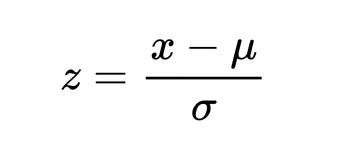

In [9]:
def robust_scaler(X_train,X_test,data_test_final):
    robust_scaler=RobustScaler()
    X_train=robust_scaler.fit_transform(X_train)
    X_test=robust_scaler.transform(X_test)
    test=robust_scaler.transform(data_test_final)
    data_train=pd.DataFrame(X_train)
    data_test=pd.DataFrame(X_test)
    data_test_final_dataframe=pd.DataFrame(test)
    
    return X_train,X_test,data_train,data_test,data_test_final_dataframe

In [10]:
def oversampled_ro(X_train,y_train):
    smote=SMOTE()
    X_train_os,y_train_os=smote.fit_resample(X_train,y_train)
    return X_train_os,y_train_os

In [11]:
def feature_enginnering(data_1,data_2):
    data_2['mean']=np.mean(data_1,axis=1)
    data_2['std_dev']=np.std(data_1,axis=1)
    data_2['variance']=np.var(data_1,axis=1)
    data_2['median']=np.median(data_1,axis=1)
    
    sine_standard_scaler=np.sin(data_1)
    cosine_standard_scaler=np.cos(data_1)
    tan_standard_scaler=np.tan(data_1)
    sinh_standard_scaler=np.sinh(data_1)
    cosh_standard_scaler=np.cosh(data_1)
    tanh_standard_scaler=np.tanh(data_1)
    
    data_2['sine']=np.mean(sine_standard_scaler,axis=1)
    data_2['cosine']=np.mean(cosine_standard_scaler,axis=1)
    data_2['tan']=np.mean(tan_standard_scaler,axis=1)
    data_2['sinh']=np.mean(sinh_standard_scaler,axis=1)
    data_2['cosh']=np.mean(cosh_standard_scaler,axis=1)
    data_2['tanh']=np.mean(tanh_standard_scaler,axis=1)

    data_2['std_sine']=np.std(sine_standard_scaler,axis=1)
    data_2['std_cosine']=np.std(cosine_standard_scaler,axis=1)
    data_2['std_tan']=np.std(tan_standard_scaler,axis=1)
    data_2['std_sinh']=np.std(sinh_standard_scaler,axis=1)
    data_2['std_cosh']=np.std(cosh_standard_scaler,axis=1)
    data_2['std_tanh']=np.std(tanh_standard_scaler,axis=1)


    data_2['var_sine']=np.var(sine_standard_scaler,axis=1)
    data_2['var_cosine']=np.var(cosine_standard_scaler,axis=1)
    data_2['var_tan']=np.var(tan_standard_scaler,axis=1)
    data_2['var_sinh']=np.var(sinh_standard_scaler,axis=1)
    data_2['var_cosh']=np.var(cosh_standard_scaler,axis=1)
    data_2['var_tanh']=np.var(tanh_standard_scaler,axis=1)


    data_2['median_sine']=np.median(sine_standard_scaler,axis=1)
    data_2['median_cosine']=np.median(cosine_standard_scaler,axis=1)
    data_2['median_tan']=np.median(tan_standard_scaler,axis=1)
    data_2['median_sinh']=np.median(sinh_standard_scaler,axis=1)
    data_2['mediam_cosh']=np.median(cosh_standard_scaler,axis=1)
    data_2['median_tanh']=np.median(tanh_standard_scaler,axis=1)


    data_2['mean_square']=np.mean(np.power(data_1,2),axis=1)
    data_2['mean_cube']=np.mean(np.power(data_1,3),axis=1)
    data_2['mean_four']=np.mean(np.power(data_1,4),axis=1)
    
    exp_standard_scaler=np.exp(data_1)
    exp2_standard_scaler=np.exp2(data_1)
    expm1_standard_scaler=np.expm1(data_1)
    
    data_2['mean_exp']=np.mean(exp_standard_scaler,axis=1)
    data_2['mean_exp2']=np.mean(exp2_standard_scaler,axis=1)
    data_2['mean_expm']=np.mean(expm1_standard_scaler,axis=1)

    data_2['median_exp']=np.median(exp_standard_scaler,axis=1)
    data_2['median_exp2']=np.median(exp2_standard_scaler,axis=1)
    data_2['median_expm']=np.median(expm1_standard_scaler,axis=1)

    data_2['std_exp']=np.std(exp_standard_scaler,axis=1)
    data_2['std_exp2']=np.std(exp2_standard_scaler,axis=1)
    data_2['std_expm']=np.std(expm1_standard_scaler,axis=1)


    data_2['var_exp']=np.var(exp_standard_scaler,axis=1)
    data_2['var_exp2']=np.var(exp2_standard_scaler,axis=1)
    data_2['var_expm']=np.var(expm1_standard_scaler,axis=1)
    
    # calcualting mean absolute deviation
    data_2['mad']=data_1.mad(axis=1)
    
    data_new=pd.DataFrame()
    for i in data_1.columns.values:
        data_new[int(i)]=data_1.iloc[:,int(i)]+abs(data_1.iloc[:,int(i)].min())     
    data_new_square=np.sqrt(data_new)
    data_2['square_root_mean']=np.mean(data_new,axis=1)
    data_2['square_root_median']=np.median(data_new,axis=1)
    data_2['square_root_std_dev']=np.std(data_new,axis=1)
    data_2['square_root_var']=np.var(data_new,axis=1)
    
    return data_2

    

In [35]:
def parameters_models(model,param,X,y):
    best_cv=StratifiedKFold(n_splits=3)
    classifier=GridSearchCV(model,param,cv=best_cv,n_jobs=-1,scoring='roc_auc',return_train_score=True,verbose=1)
    classifier.fit(X,y)
    train_auc=classifier.cv_results_['mean_train_score']
    train_auc_std=classifier.cv_results_['std_train_score']
    cv_auc = classifier.cv_results_['mean_test_score'] 
    cv_auc_std= classifier.cv_results_['std_test_score']

    print("best alpha/parameter",classifier.best_params_)
    
    return classifier
    

In [13]:
def modelling(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)

    y_train_pred=model.predict_proba(X_train)
    y_train_pred = y_train_pred[:, 1]

    y_test_pred=model.predict_proba(X_test)
    y_test_pred=y_test_pred[:,1]
    
    return y_train_pred,y_test_pred,model

In [14]:
def modelling_lasso(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    return y_train_pred,y_test_pred,model

In [15]:
def calibrated(model,X_train,y_train,X_test):
    calib = CalibratedClassifierCV(model, cv='prefit')
    model=calib.fit(X_train,y_train)
    
    y_train_pred=model.predict_proba(X_train)
    y_train_pred = y_train_pred[:, 1]

    y_test_pred=model.predict_proba(X_test)
    y_test_pred=y_test_pred[:,1]
    
    return y_train_pred,y_test_pred,model

In [16]:
def roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred):

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False positive rate(FPR)")
    plt.ylabel("True positive rate(TPR)")
    plt.title("AUC")
    plt.grid()
    plt.show()
    
    auc_list=[auc(train_fpr, train_tpr),auc(test_fpr, test_tpr)]
    
    return auc_list
    

In [17]:
def feature_selection(model,X,y):
    rfecv=RFECV(model,step=10,min_features_to_select=40,cv=best_cv,verbose=1,scoring='roc_auc',n_jobs=-1)
    rfecv.fit(X,y)
    print("Optimal Feature",rfecv.n_features_)
    print("Feature_names",rfecv.get_feature_names_out())
    
    return rfecv.support_
    

In [18]:
def box_cox_transformation(train_dataframe,test_dataframe,original_test):
    power_transformer=PowerTransformer(method='yeo-johnson')
    final_dataframe_train_box=power_transformer.fit_transform(train_dataframe)
    final_dataframe_test_box=power_transformer.transform(test_dataframe)
    final_dataframe_original_test_box=power_transformer.transform(original_test)
    
    return final_dataframe_train_box,final_dataframe_test_box,final_dataframe_original_test_box

In [19]:
def box_cox_transformation1(train_dataframe,original_test):
    power_transformer=PowerTransformer(method='yeo-johnson')
    final_dataframe_train_box=power_transformer.fit_transform(train_dataframe)
    final_dataframe_original_test_box=power_transformer.transform(original_test)
    
    return final_dataframe_train_box,final_dataframe_original_test_box

In [20]:
X_train_ss,X_test_ss,df_train_ss,df_test_ss,df_test_final=robust_scaler(X_train,X_test,data_test_1)
print(df_test_final.shape)

(19750, 300)


In [21]:
x_train = data.drop(['id', 'target'], axis=1)
y_train_1 = data['target']

x_test = data_test.drop(['id'], axis=1)

robust_scaler=RobustScaler()
x_train = robust_scaler.fit_transform(x_train)
x_test = robust_scaler.transform(x_test)

## Used Tree base methods because because they are giving good results

## Flow Chart

The models used in this notebook are:

1.Logistic Regression

2.Decision Tree

3.SVClassifier

4.Random Forest

5.XGboost

1.Used decision tree as base model to take out important features with feature selection technique called RFECV and made dataframe of that reduced feature.

2.Made models without hyperparameter tuning on reduced feature set and made again those models with hyperparameter tuning.
This comprises of DATASET 1

1.Done feature enginnering on original X_train and X_test dataset and then standardize it.

2.Run all models with enginnered features.This comprises of DATASET 2.


1.Take the reduced feature dataset and done feature transformation (box_cox transformation) with standardization.This comprises of our DATASET 3.


1.Take the original features which are standardize earlier done PCA on top of it.Taken all those features which preserve 99% variance of data.This comprises of DATASET 4

1.Done oversampling on original train and standardize it.Get all the important feature through RFECV using decison tree as base model.

2.Done feature enginnering on train oversampled and standardize it.

3.Made all models.This comprises of our DATASET 5

1.Done PCA on reduced feature set which i got earlier through logistic regression and got only those components which preserve 99% variance of data.

2.Made all models on it.This Comprises of DATASET 6

1.Made a new dataset called DATASET 7 which is same as of DATASET 3 but in this dataset feature transformation is done on reduced feature which i got from oversampled dataset

## DATASET 1-Reduced featureset using RFECV along with standardization

## decison Tree using RFECV

We have selected feature using wrapper technique called RFECV

RFECV=Recursive Feature Elimination using Cross Validation

It is a Wrapper technique.

I will take the reduced features from decision tree i get and will made models

## Making the models on whole data without train test split

## SGDlogloss

In [36]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],
       'class_weight': [ {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
grid = GridSearchCV(estimator=sgd, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(x_train,y_train_1)

print(grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'alpha': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}


In [37]:
sgd_model=SGDClassifier(alpha=grid.best_params_['alpha'],
                        penalty=grid.best_params_['penalty'],
                        loss=grid.best_params_['loss'],
                       class_weight=grid.best_params_['class_weight'],
                       learning_rate=grid.best_params_['learning_rate'])
model=sgd_model.fit(x_train,y_train_1)

In [38]:
calib = CalibratedClassifierCV(model, cv='prefit')
model=calib.fit(x_train,y_train_1)
y_test_pred=model.predict_proba(x_test)
y_test_pred=y_test_pred[:,1]

In [39]:
submit3=pd.read_csv("sample_submission.csv")
submit3['target']=y_test_pred

x3=submit3.to_csv("sgd_log_full_robust_3.csv",index=False)

# pd.read_csv("sgd_log_full_robust.csv")

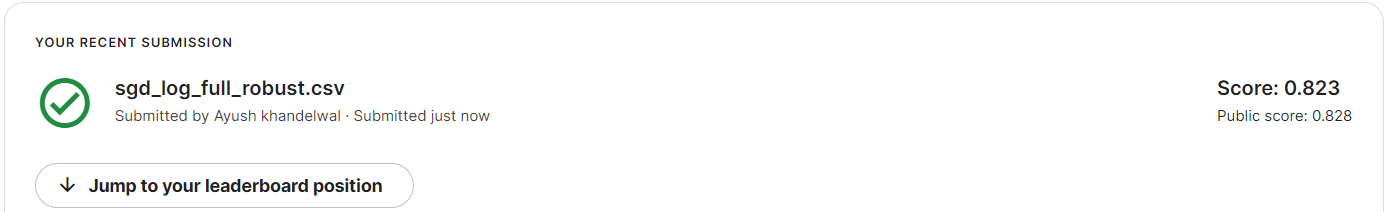

## Huber

In [27]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
grid = GridSearchCV(estimator=sgd, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(x_train,y_train_1)

print(grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'alpha': 0.1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'elasticnet'}


In [28]:
sgd_model=SGDClassifier(alpha=grid.best_params_['alpha'],
                        penalty=grid.best_params_['penalty'],
                        loss=grid.best_params_['loss'],
                       class_weight=grid.best_params_['class_weight'],
                       learning_rate=grid.best_params_['learning_rate'])
model=sgd_model.fit(x_train,y_train_1)

In [29]:
calib = CalibratedClassifierCV(model, cv='prefit')
model=calib.fit(x_train,y_train_1)
y_test_pred=model.predict_proba(x_test)
y_test_pred=y_test_pred[:,1]

In [30]:
submit2=pd.read_csv("sample_submission.csv")
submit2['target']=y_test_pred

x2=submit3.to_csv("sgd_huber_full_robust.csv",index=False)

# pd.read_csv("sgd_huber_full_robust.csv")

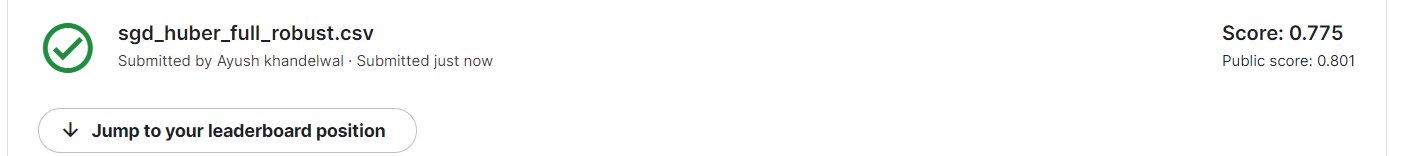

## Hinge

In [35]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
grid = GridSearchCV(estimator=sgd, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(x_train,y_train_1)

print(grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'alpha': 0.1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'elasticnet'}


In [36]:
sgd_model=SGDClassifier(alpha=grid.best_params_['alpha'],
                        penalty=grid.best_params_['penalty'],
                        loss=grid.best_params_['loss'],
                       class_weight=grid.best_params_['class_weight'],
                       learning_rate=grid.best_params_['learning_rate'])
model=sgd_model.fit(x_train,y_train_1)

In [37]:
calib = CalibratedClassifierCV(model, cv='prefit')
model=calib.fit(x_train,y_train_1)
y_test_pred=model.predict_proba(x_test)
y_test_pred=y_test_pred[:,1]

In [38]:
submit1=pd.read_csv("sample_submission.csv")
submit1['target']=y_test_pred

x1=submit1.to_csv("sgd_huber_full_robust.csv",index=False)

# pd.read_csv("sgd_hinge_full_robust.csv")

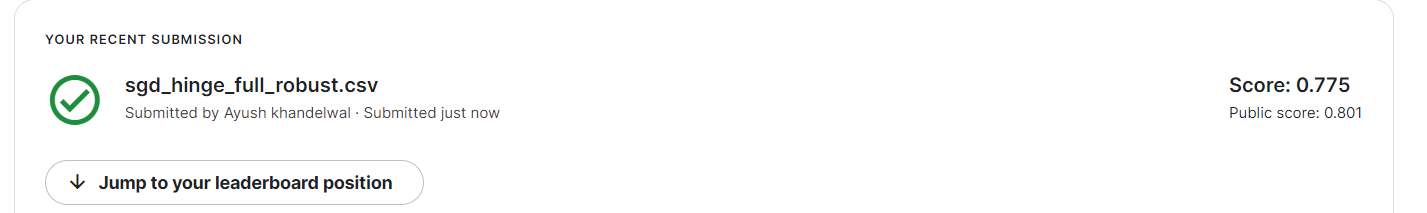

## logistic regression

In [26]:
logistic_regression=LogisticRegression()
param={'C': [0.001,0.01,0.1,1,10,100,1000],
       'penalty':['l1','l2','elasticnet'],
       'solver':['liblinear','saga'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
      }

grid = GridSearchCV(estimator=logistic_regression, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(x_train,y_train_1)

print(grid.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'C': 1, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l1', 'solver': 'liblinear'}


In [27]:
log_reg_model=LogisticRegression(C=grid.best_params_['C'],
                   solver=grid.best_params_['solver'],
                penalty=grid.best_params_['penalty'],
                class_weight=grid.best_params_['class_weight'])

predictions = log_reg_model.fit(x_train, y_train_1).predict_proba(x_test)

pred=(predictions[:,1])
# print(pred.reshape(-1,1))

In [28]:
submit4=pd.read_csv("sample_submission.csv")
submit4['target']=pred

x4=submit4.to_csv("logistic_regression_full_robust.csv",index=False)

# pd.read_csv("logistic_regression_full_robust.csv")

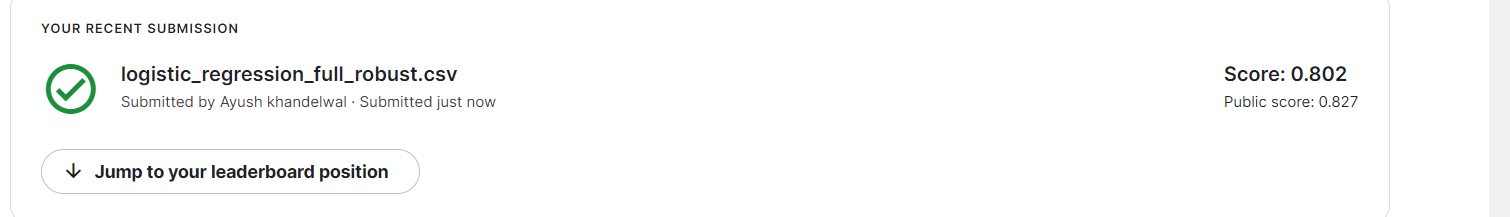

## Basic models starts:

In [93]:
decision_tree=DecisionTreeClassifier()
best_cv=StratifiedKFold(n_splits=7)

In [95]:
rfecv=feature_selection(decision_tree,X_train_ss,y_train)

Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
Fitting estimator with 230 features.
Fitting estimator with 220 features.
Fitting estimator with 210 features.
Fitting estimator with 200 features.
Fitting estimator with 190 features.
Fitting estimator with 180 features.
Fitting estimator with 170 features.
Fitting estimator with 160 features.
Optimal Feature 150
Feature_names ['x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13' 'x14' 'x15' 'x16' 'x17' 'x18'
 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25' 'x26' 'x27' 'x28' 'x29' 'x30'
 'x31' 'x32' 'x33' 'x34' 'x35' 'x36' 'x37' 'x38' 'x39' 'x40' 'x41' 'x42'
 'x43' 'x44' 'x45' 'x46' 'x47' 'x48' 'x49' 'x50' 'x51' 'x52' 'x53' 'x54'
 'x55' 'x56' 'x57' 'x58' 'x59' 'x60' 'x61' 'x62' 'x63' 'x64' 'x65' 'x66'
 'x67' 'x68' 'x69' 'x70' 'x71' 'x72' 'x73' '

In [96]:
top_80_feat=list(np.where(rfecv)[0])[:80]

In [97]:
df_train_reduced=df_train_ss[df_train_ss.columns[top_80_feat]]
df_train_reduced.shape

(175, 80)

In [98]:
df_test_reduced=df_test_ss[df_train_ss.columns[top_80_feat]]
df_test_reduced.shape

(75, 80)

In [99]:
df_test_reduced_original=df_test_final[df_train_ss.columns[top_80_feat]]
df_test_reduced_original.shape

(19750, 80)

SGD with hinge loss

In [117]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced,y_train)
print(classifier)

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


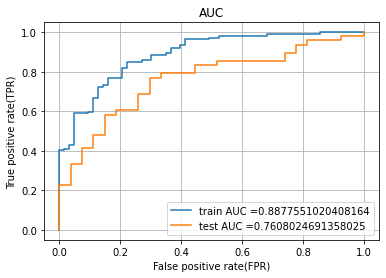

In [118]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced,y_train)

y_train_pred,y_test_pred,model102=calibrated(sgd_model,df_train_reduced,y_train,df_test_reduced)

sgd_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

SGD with log loss

In [119]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced,y_train)
print(classifier)

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


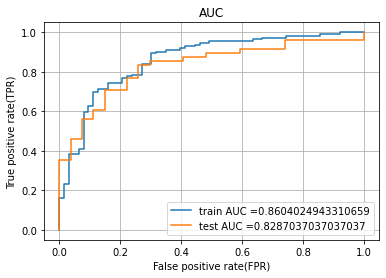

In [120]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced,y_train)

y_train_pred,y_test_pred,model103=calibrated(sgd_model,df_train_reduced,y_train,df_test_reduced)

sgd_h_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [121]:
test_id = data_test['id']
sgd_h_dt1 = model103.predict_proba(df_test_reduced_original)[:,1]
sgd_h_dt1_log_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt1)), columns=['id','target'])
sgd_h_dt1_log_1['id'] =sgd_h_dt1_log_1['id'].astype('int32')
sgd_h_dt1_log_1.to_csv('submission_sgd_h_dt1_kog_robust.csv', index=False)

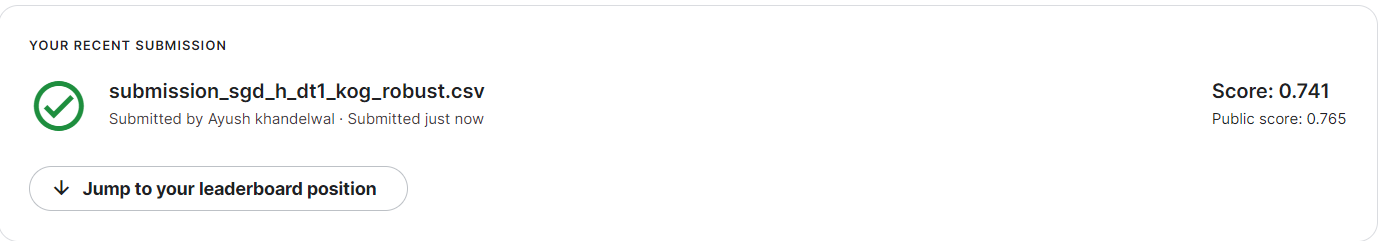

SGD with huber loss

In [122]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced,y_train)
print(classifier)

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.6, 0: 0.4}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l1'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


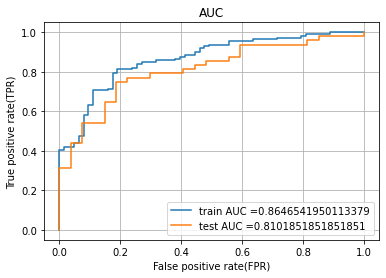

In [123]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
#                        class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced,y_train)

y_train_pred,y_test_pred,model104=calibrated(sgd_model,df_train_reduced,y_train,df_test_reduced)

sgd_h_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [124]:
test_id = data_test['id']
sgd_h_dt1 = model104.predict_proba(df_test_reduced_original)[:,1]
sgd_h_dt1_huber_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt1)), columns=['id','target'])
sgd_h_dt1_huber_1['id'] =sgd_h_dt1_huber_1['id'].astype('int32')
sgd_h_dt1_huber_1.to_csv('submission_sgd_h_dt1_huber_1_robust.csv', index=False)

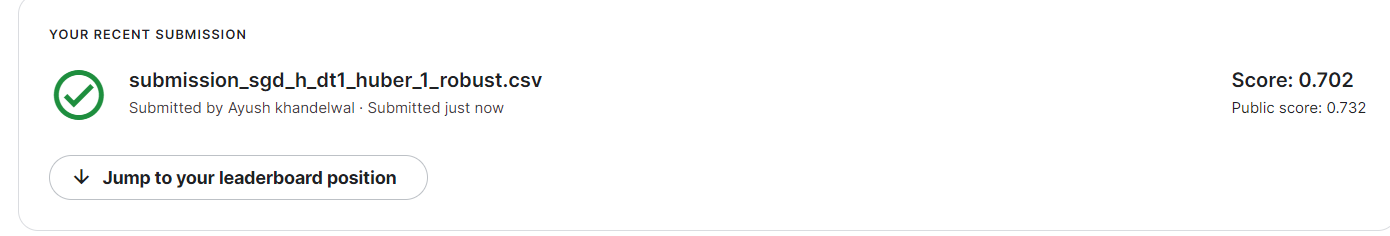

## Logistic Regression

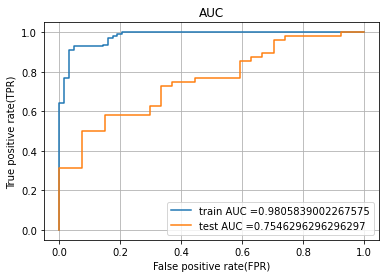

In [106]:
log_reg_model=LogisticRegression()
y_train_pred,y_test_pred,model1=modelling(log_reg_model,df_train_reduced,y_train,df_test_reduced)

lg_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## SVClassifier

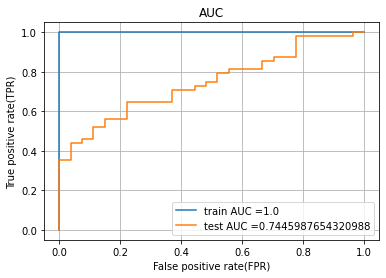

In [42]:
svc_model=SVC(probability=True)
y_train_pred,y_test_pred,model2=modelling(svc_model,df_train_reduced,y_train,df_test_reduced)

svc_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)


## Decision Tree

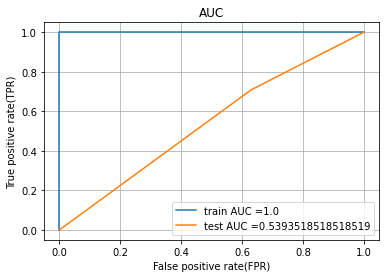

In [43]:
decision_tree=DecisionTreeClassifier()
y_train_pred,y_test_pred,model3=modelling(decision_tree,df_train_reduced,y_train,df_test_reduced)

dt_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Random Forest

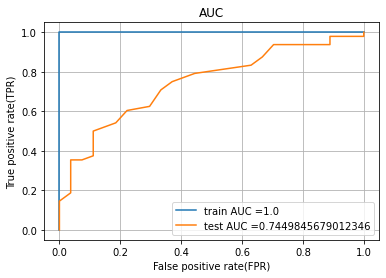

In [44]:
random_forest_model=RandomForestClassifier()
y_train_pred,y_test_pred,model4=modelling(random_forest_model,df_train_reduced,y_train,df_test_reduced)

rf_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## XGBoost

[21:38:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


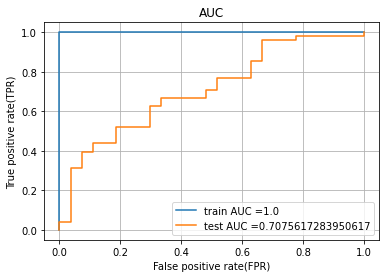

In [45]:
xgb_model=XGBClassifier()
y_train_pred,y_test_pred,model5=modelling(xgb_model,df_train_reduced,y_train,df_test_reduced)

xgb_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## LassoCV


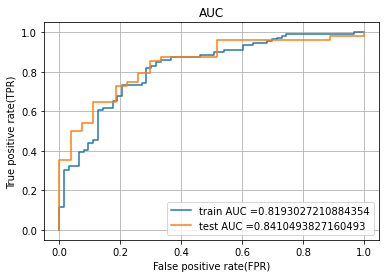

In [46]:
lasso_cv=LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
y_train_pred,y_test_pred,model6=modelling_lasso(lasso_cv,df_train_reduced,y_train,df_test_reduced)

lasso_cv_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [44]:
test_id = data_test['id']
lasso_cv_dt1_final = model6.predict(df_test_reduced_original)
lasso_cv_dt1_final1 = pd.DataFrame(np.column_stack((test_id,lasso_cv_dt1_final)), columns=['id','target'])
lasso_cv_dt1_final1['id'] = lasso_cv_dt1_final1['id'].astype('int32')
lasso_cv_dt1_final1.to_csv('submission_lasso_cv_dt1_final1_robustoutlier_1_50.csv', index=False)

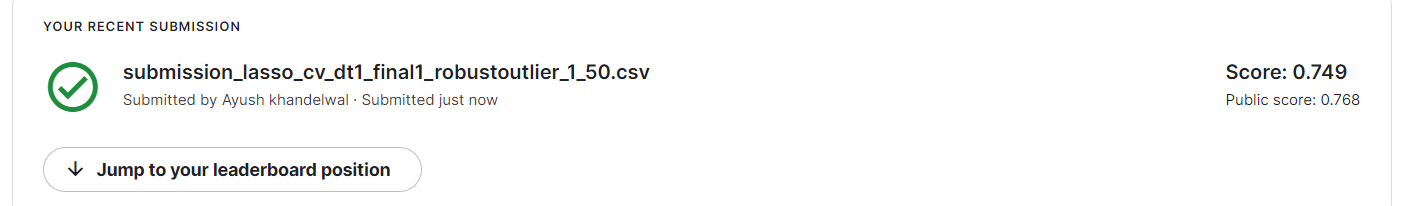

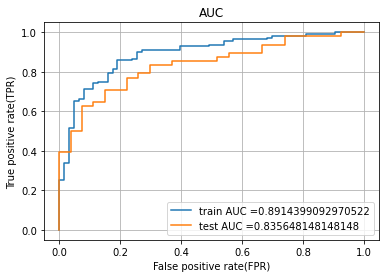

In [49]:
lasso_cv=LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
y_train_pred,y_test_pred,model_full=modelling_lasso(lasso_cv,df_train_ss,y_train,df_test_ss)

lasso_cv_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [46]:
test_id = data_test['id']
lasso_cv_dt1_final = model_full.predict(df_test_final)
lasso_cv_dt1_final1 = pd.DataFrame(np.column_stack((test_id,lasso_cv_dt1_final)), columns=['id','target'])
lasso_cv_dt1_final1['id'] = lasso_cv_dt1_final1['id'].astype('int32')
lasso_cv_dt1_final1.to_csv('submission_lasso_cv_dt1_full_robustoutlier_1_50.csv', index=False)

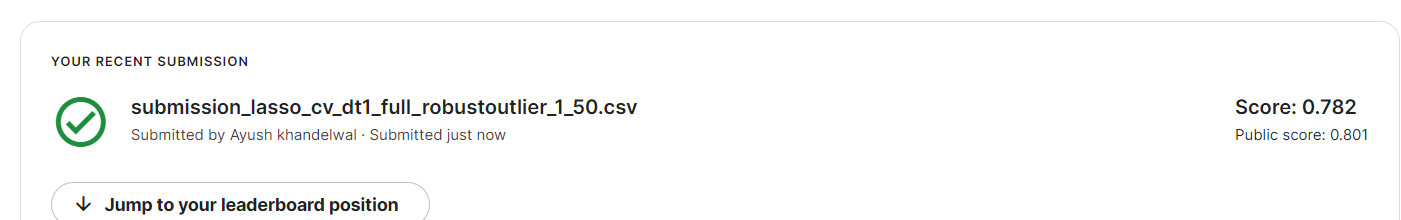

## Logistic Regression Using hyperparameter

In [55]:
logistic_regression=LogisticRegression()
param={'C': [0.001,0.01,0.1,1,10,100],
       'penalty':['l1','l2'],
       'solver':['liblinear'],
#        'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
      }
classifier=parameters_models(logistic_regression,param,df_train_reduced,y_train)
print(classifier)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [57]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'],
                   solver=classifier.best_params_['solver'],
                   penalty=classifier.best_params_['penalty'],
#                   class_weight=classifier.best_params_['class_weight']
                                )
y_train_pred,y_test_pred,model7=modelling(log_reg_model,df_train_reduced,y_train,df_test_reduced)


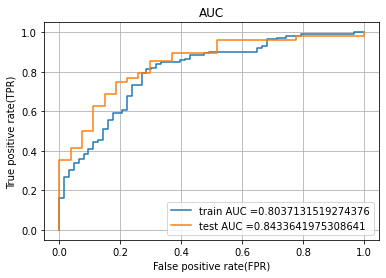

In [58]:
lg_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [58]:
test_id = data_test['id']
lg_h_dt1_final = model7.predict_proba(df_test_reduced_original)[:,1]
log_reg_final = pd.DataFrame(np.column_stack((test_id,lg_h_dt1_final)), columns=['id','target'])
log_reg_final['id'] = log_reg_final['id'].astype('int32')
log_reg_final.to_csv('submission_log_reg_final_robustoutlier_1_50_1.csv', index=False)

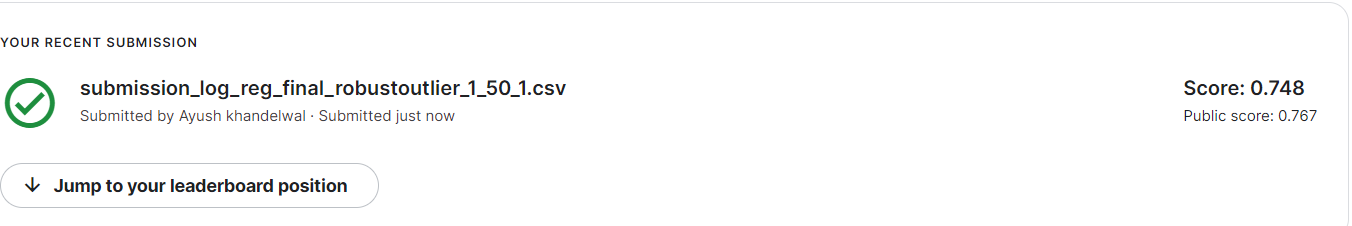

## SVClassifier using Hyperparmaeter

In [59]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01],
        'C': [3,4,5,6],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,df_train_reduced,y_train)
print(classifier)


Fitting 7 folds for each of 24 candidates, totalling 168 fits
best alpha/parameter {'C': 6, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [3, 4, 5, 6], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [60]:
svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model8=modelling(svc_model,df_train_reduced,y_train,df_test_reduced)

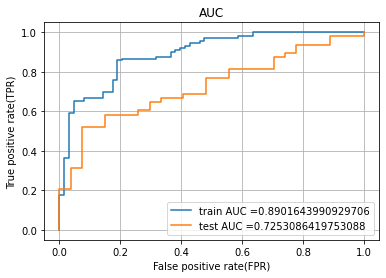

In [61]:
svc_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [62]:
test_id = data_test['id']
svc_h_dt1_final = model8.predict_proba(df_test_reduced_original)[:,1]
svc_final = pd.DataFrame(np.column_stack((test_id,svc_h_dt1_final)), columns=['id','target'])
svc_final['id'] = svc_final['id'].astype('int32')
svc_final.to_csv('submission_svc_final_standardization_1_50_.csv', index=False)

## Decision Tree using Hyperparameter

In [63]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,12,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,df_train_reduced,y_train)
print(classifier)


Fitting 7 folds for each of 128 candidates, totalling 896 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [64]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model9=modelling(decision_tree_model,df_train_reduced,y_train,df_test_reduced)

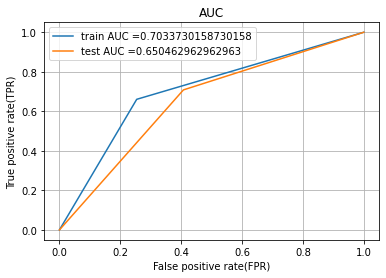

In [65]:
dt_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Random Forest using Hyperparameter 

In [66]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[4,5,6],'max_depth':[10,12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[4,5,6,7],'max_features':['sqrt', 'log2',None],'max_samples':[0.7]}
classifier=parameters_models(random_forest,param,df_train_reduced,y_train)
print(classifier)

Fitting 7 folds for each of 720 candidates, totalling 5040 fits
best alpha/parameter {'max_depth': 10, 'max_features': None, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 4}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [4, 5, 6]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [67]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'],max_samples=classifier.best_params_['max_samples'])
y_train_pred,y_test_pred,model10=modelling(random_forest_model,df_train_reduced,y_train,df_test_reduced)

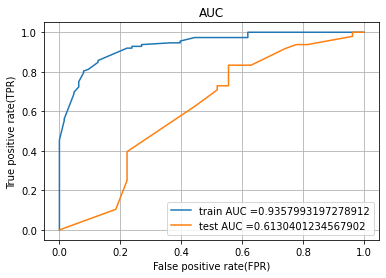

In [68]:
rf_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## XGBoost using Hyperparameter 

In [69]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[2,3,5],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,df_train_reduced,y_train)
print(classifier)

Fitting 7 folds for each of 648 candidates, totalling 4536 fits
[21:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.5, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 20, 'subsample': 0.3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                           

In [70]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)
y_train_pred,y_test_pred,model11=modelling(xgb_model,df_train_reduced,y_train,df_test_reduced)

[21:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


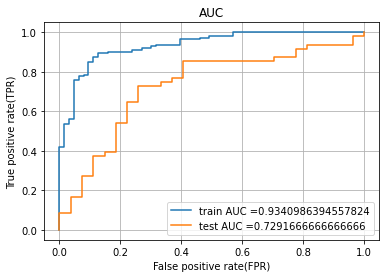

In [71]:
xgb_h_dt1=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## DATASET 2-Dataset with only engineered features along with Standardization.

## Feature Enginnering

This transformation is explained in EDA video and classroom classes by appliedaicourse under logistic regression module. https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3025/non-linearly-separable-data-feature-engineering/3/module-3-foundations-of-natural-language-processing-and-machine-learning

I have done feature enginnering with X_train and X_test and normalize it.


Feature enginnering on train dataset

In [72]:
df_train_feature_eng=pd.DataFrame()
df_train_feature_eng=feature_enginnering(X_train,df_train_feature_eng)
df_train_feature_eng.shape

(175, 48)

Feature enginnering on test Dataset

In [73]:
df_test_feature_eng=pd.DataFrame()
df_test_feature_eng=feature_enginnering(X_test,df_test_feature_eng)
df_test_feature_eng.shape

(75, 48)

Feature enginnering on original test Dataset

In [74]:
df_test_feature_eng_original=pd.DataFrame()
df_test_feature_eng_original=feature_enginnering(data_test_1,df_test_feature_eng_original)
df_test_feature_eng_original.shape

(19750, 48)

standard scaler

In [78]:
df_train_feat,df_test_feat,df_train_feature_eng_ss,df_test_feature_eng_ss,df_test_final_feature_eng_ss=robust_scaler(df_train_feature_eng,df_test_feature_eng,df_test_feature_eng_original)

print((df_train_feature_eng_ss.shape),df_test_feature_eng_ss.shape,df_test_final_feature_eng_ss.shape)

(175, 48) (75, 48) (19750, 48)


Modelling is done only on the enginnered feature

Logistic Regression

Fitting 7 folds for each of 24 candidates, totalling 168 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)


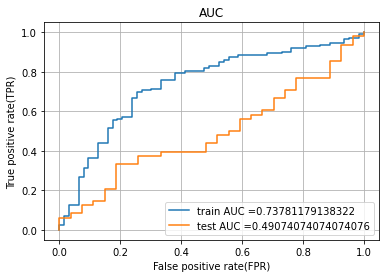

In [79]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear','saga']}
classifier=parameters_models(log_reg,param,df_train_feature_eng_ss,y_train)
print(classifier)

log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model12=modelling(log_reg_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)

lg_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

LassoCV

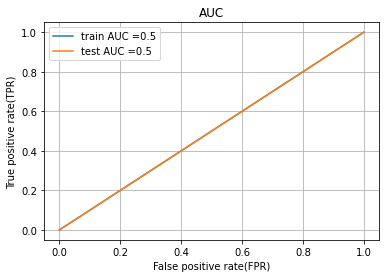

In [80]:
lasso_cv=LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
y_train_pred,y_test_pred,model13=modelling_lasso(lasso_cv,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)

lasso_cv_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

SVClassifier

Fitting 7 folds for each of 24 candidates, totalling 168 fits
best alpha/parameter {'C': 2, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'linear', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [2, 3, 4], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


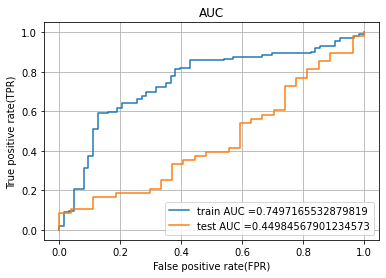

In [81]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1],
        'C': [2,3,4],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,df_train_feature_eng_ss,y_train)
print(classifier)

svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model14=modelling(svc_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)

svc_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Decision Tree

Fitting 7 folds for each of 160 candidates, totalling 1120 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 13, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


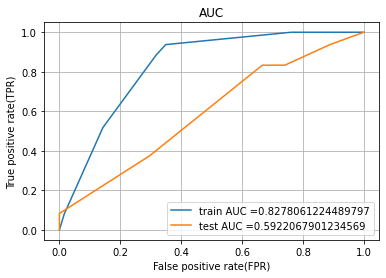

In [82]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,df_train_feature_eng_ss,y_train)
print(classifier)

decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model15=modelling(decision_tree_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)


dt_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)


Random Forest

Fitting 7 folds for each of 540 candidates, totalling 3780 fits
best alpha/parameter {'max_depth': 15, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 6}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [4, 5, 6]},
             return_train_score=True, scoring='roc_auc', verbose=1)


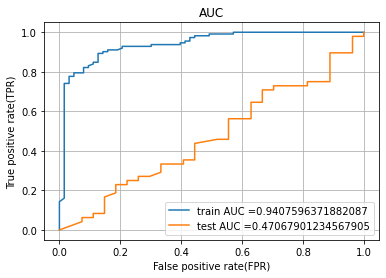

In [83]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[4,5,6],'max_depth':[10,12,13,14,15],'min_samples_leaf':[1,2,3],
        'min_samples_split':[3,5,7,9],'max_features':['sqrt', 'log2', None],'max_samples':[0.7]}
classifier=parameters_models(random_forest,param,df_train_feature_eng_ss,y_train)
print(classifier)

random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'],max_samples=classifier.best_params_['max_samples'])
y_train_pred,y_test_pred,model16=modelling(random_forest_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)

rf_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

XGboost

Fitting 7 folds for each of 648 candidates, totalling 4536 fits
[21:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 15, 'subsample': 0.1}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                           

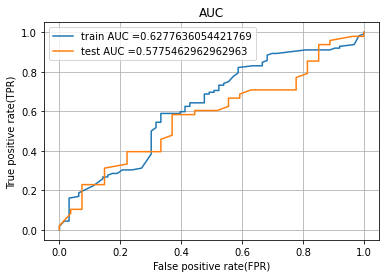

In [86]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[1,2,3],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,df_train_feature_eng_ss,y_train)
print(classifier)

xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model17=modelling(xgb_model,df_train_feature_eng_ss,y_train,df_test_feature_eng_ss)

xgb_dt2=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

##  Dataset 3 - Dataset with transformed features on the reduced dimensionality along with standardization.

BoxCox Transformation

In [87]:
box_cox_train_ss,box_cox_test_ss,box_cox_original_test_ss=box_cox_transformation(df_train_reduced,df_test_reduced,df_test_reduced_original)

print((box_cox_train_ss.shape),box_cox_test_ss.shape,box_cox_original_test_ss.shape)

(175, 80) (75, 80) (19750, 80)


## Box Cox transformation without train test split

In [28]:
original_boxcox_train,original_boxcox_test=box_cox_transformation1(x_train,x_test)

## SGD logloss

In [29]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],
       'class_weight': [{1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
grid = GridSearchCV(estimator=sgd, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(original_boxcox_train,y_train_1)

print(grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'alpha': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}


In [30]:
sgd_model=SGDClassifier(alpha=grid.best_params_['alpha'],
                        penalty=grid.best_params_['penalty'],
                        loss=grid.best_params_['loss'],
                       class_weight=grid.best_params_['class_weight'],
                       learning_rate=grid.best_params_['learning_rate'])
model=sgd_model.fit(original_boxcox_train,y_train_1)

calib = CalibratedClassifierCV(model, cv='prefit')
model=calib.fit(original_boxcox_train,y_train_1)
y_test_pred=model.predict_proba(original_boxcox_test)
y_test_pred=y_test_pred[:,1]

In [31]:
submit3=pd.read_csv("sample_submission.csv")
submit3['target']=y_test_pred

x3=submit3.to_csv("sgd_log_fulldt3_robust_4_rerun1.csv",index=False)

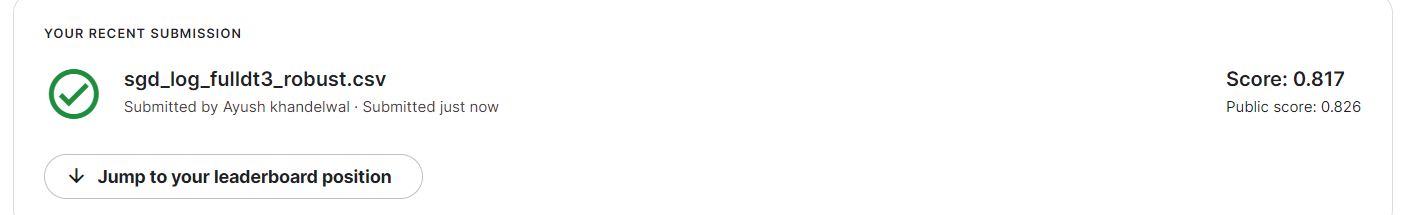

In [32]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
grid = GridSearchCV(estimator=sgd, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(original_boxcox_train,y_train_1)

print(grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'alpha': 0.1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}


In [33]:
sgd_model=SGDClassifier(alpha=grid.best_params_['alpha'],
                        penalty=grid.best_params_['penalty'],
                        loss=grid.best_params_['loss'],
                       class_weight=grid.best_params_['class_weight'],
                       learning_rate=grid.best_params_['learning_rate'])
model=sgd_model.fit(original_boxcox_train,y_train_1)

calib = CalibratedClassifierCV(model, cv='prefit')
model=calib.fit(original_boxcox_train,y_train_1)
y_test_pred=model.predict_proba(original_boxcox_test)
y_test_pred=y_test_pred[:,1]

In [34]:
submit3=pd.read_csv("sample_submission.csv")
submit3['target']=y_test_pred

x3=submit3.to_csv("sgd_log_fulldt3_robust_43.csv",index=False)

## SGD huberloss

In [105]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
grid = GridSearchCV(estimator=sgd, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(original_boxcox_train,y_train_1)

print(grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'alpha': 0.1, 'class_weight': {1: 0.4, 0: 0.6}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'elasticnet'}


In [106]:
sgd_model=SGDClassifier(alpha=grid.best_params_['alpha'],
                        penalty=grid.best_params_['penalty'],
                        loss=grid.best_params_['loss'],
                       class_weight=grid.best_params_['class_weight'],
                       learning_rate=grid.best_params_['learning_rate'])
model=sgd_model.fit(original_boxcox_train,y_train_1)

calib = CalibratedClassifierCV(model, cv='prefit')
model=calib.fit(original_boxcox_train,y_train_1)
y_test_pred=model.predict_proba(original_boxcox_test)
y_test_pred=y_test_pred[:,1]

In [107]:
submit3=pd.read_csv("sample_submission.csv")
submit3['target']=y_test_pred

x3=submit3.to_csv("sgd_huber_fulldt3_robust.csv",index=False)

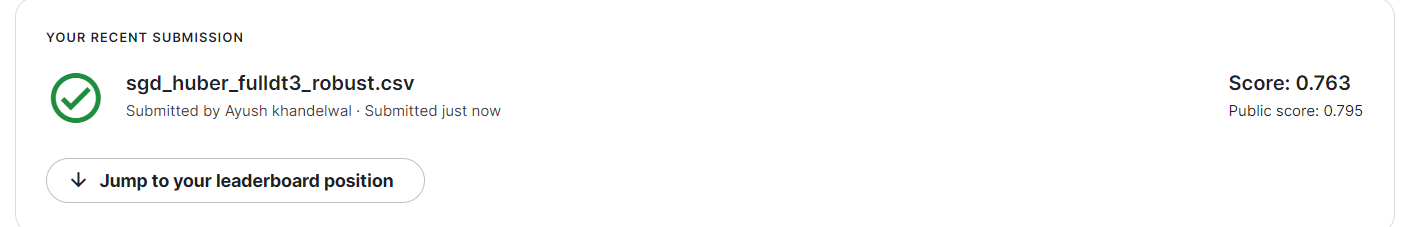

## SGD Logistic Regression

In [52]:
logistic_regression=LogisticRegression()
param={'C': [0.001,0.01,0.1,1,10,100,1000],
       'penalty':['l1','l2','elasticnet'],
       'solver':['liblinear','saga'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
      }

grid = GridSearchCV(estimator=logistic_regression, param_grid=param, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(original_boxcox_train,y_train_1)

print(grid.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'C': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


In [53]:
log_reg_model=LogisticRegression(C=grid.best_params_['C'],
                   solver=grid.best_params_['solver'],
                penalty=grid.best_params_['penalty'],
                class_weight=grid.best_params_['class_weight'])

predictions = log_reg_model.fit(original_boxcox_train, y_train_1).predict_proba(original_boxcox_test)

pred=(predictions[:,1])
# print(pred.reshape(-1,1))

In [54]:
submit4=pd.read_csv("sample_submission.csv")
submit4['target']=pred

x4=submit4.to_csv("logistic_regressionst3_full_robust.csv",index=False)

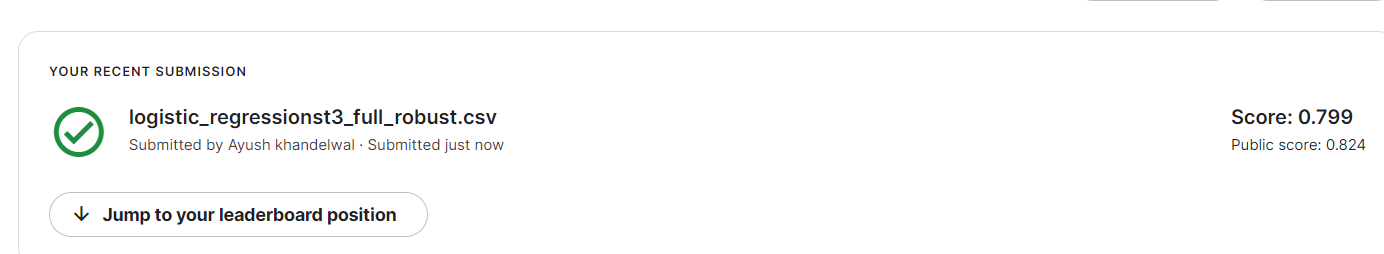

## reduced features models with boxcox transformation

SGD with hinge loss

In [91]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,box_cox_train_ss,y_train)
print(classifier)

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


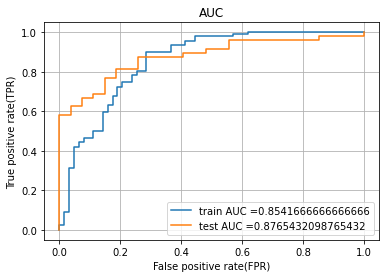

In [92]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(box_cox_train_ss,y_train)

y_train_pred,y_test_pred,model01=calibrated(sgd_model,box_cox_train_ss,y_train,box_cox_test_ss)

sgd_h_dt3_hinge=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [100]:
test_id = data_test['id']
sgd_h_dt3_hinge = model01.predict_proba(box_cox_original_test_ss)[:,1]
sgd_h_dt3_hinge_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt3_hinge)), columns=['id','target'])
sgd_h_dt3_hinge_1['id'] =sgd_h_dt3_log_1['id'].astype('int32')
sgd_h_dt3_hinge_1.to_csv('submission_sgd_h_dt3_hinge_robust_.csv', index=False)

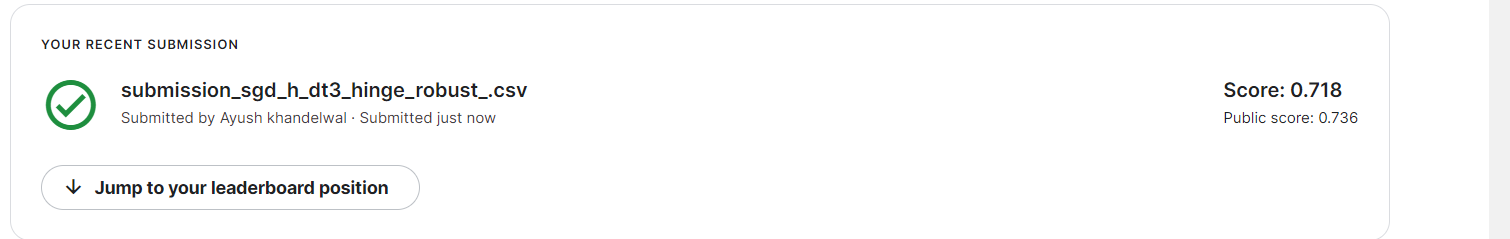

SGD with logloss

In [93]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,box_cox_train_ss,y_train)
print(classifier)

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.6, 0: 0.4}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


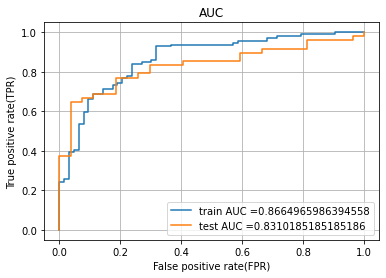

In [94]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(box_cox_train_ss,y_train)

y_train_pred,y_test_pred,model102=calibrated(sgd_model,box_cox_train_ss,y_train,box_cox_test_ss)

sgd_h_dt3_log=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [99]:
test_id = data_test['id']
sgd_h_dt3_log = model102.predict_proba(box_cox_original_test_ss)[:,1]
sgd_h_dt3_log_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt3_log)), columns=['id','target'])
sgd_h_dt3_log_1['id'] =sgd_h_dt3_log_1['id'].astype('int32')
sgd_h_dt3_log_1.to_csv('submission_sgd_h_log_dt3_robust_.csv', index=False)

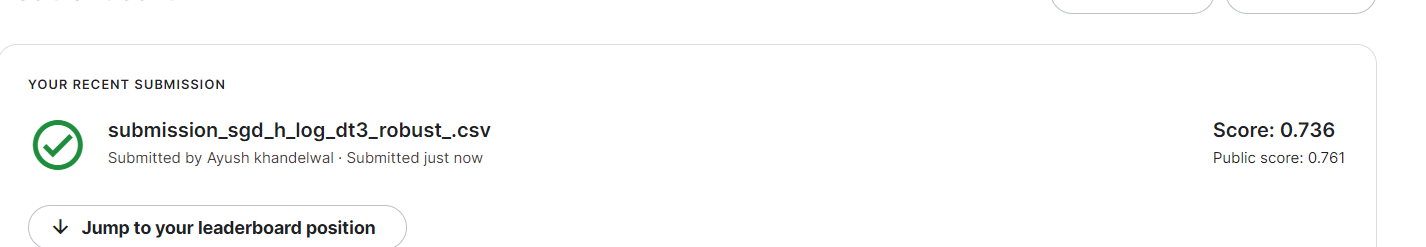

SGD with huber loss

In [95]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,box_cox_train_ss,y_train)
print(classifier)

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.6, 0: 0.4}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l1'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


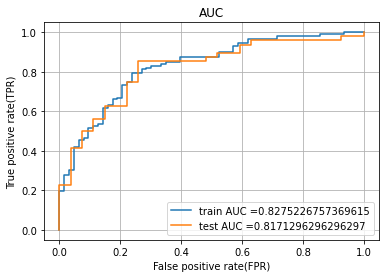

In [96]:
sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(box_cox_train_ss,y_train)

y_train_pred,y_test_pred,model103=calibrated(sgd_model,box_cox_train_ss,y_train,box_cox_test_ss)

sgd_h_dt3_huber=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [97]:
test_id = data_test['id']
sgd_h_dt3_huber = model103.predict_proba(box_cox_original_test_ss)[:,1]
sgd_h_dt3_huber_1 = pd.DataFrame(np.column_stack((test_id,sgd_h_dt3_huber)), columns=['id','target'])
sgd_h_dt3_huber_1['id'] =sgd_h_dt3_huber_1['id'].astype('int32')
sgd_h_dt3_huber_1.to_csv('submission_sgd_h_dt3_huber_huber_standard.csv', index=False)

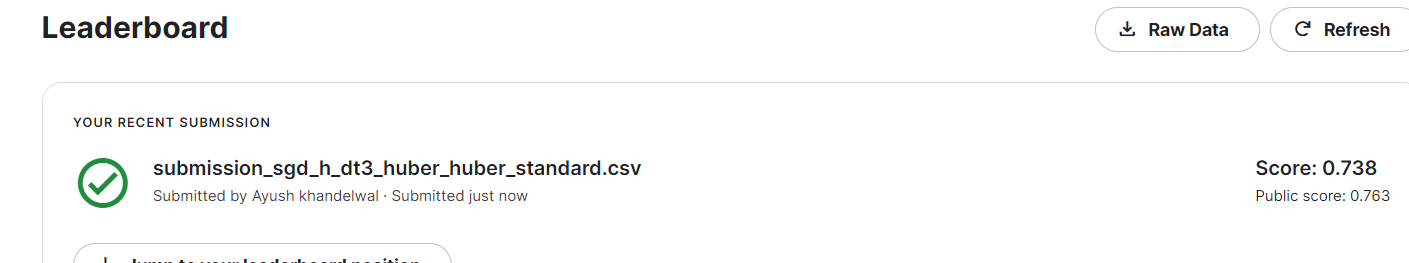

Logistic Regression

Fitting 7 folds for each of 12 candidates, totalling 84 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


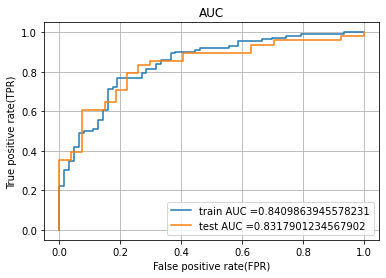

In [88]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,box_cox_train_ss,y_train)
print(classifier)

log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model18=modelling(log_reg_model,box_cox_train_ss,y_train,box_cox_test_ss)

lg_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [83]:
test_id = data_test['id']
lg_bx_dt3 = model18.predict_proba(box_cox_original_test_ss)[:,1]
lg_bx_dt3_1 = pd.DataFrame(np.column_stack((test_id,lg_bx_dt3)), columns=['id','target'])
lg_bx_dt3_1['id'] = lg_bx_dt3_1['id'].astype('int32')
lg_bx_dt3_1.to_csv('submission_lg_bx_dt3_1_robustoutlier_1_50_new.csv', index=False)

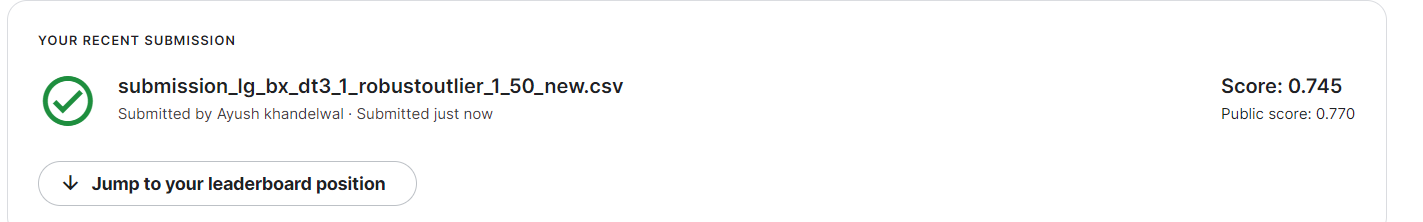

LassoCV

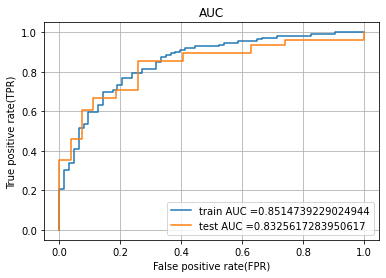

In [89]:
lasso_cv=LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
y_train_pred,y_test_pred,model19=modelling_lasso(lasso_cv,box_cox_train_ss,y_train,box_cox_test_ss)

lasso_cv_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [111]:
test_id = data_test['id']
lasso_cv_bx_dt3 = model19.predict(box_cox_original_test_ss)
lasso_cv_bx_dt3_1 = pd.DataFrame(np.column_stack((test_id,lasso_cv_bx_dt3)), columns=['id','target'])
lasso_cv_bx_dt3_1['id'] = lasso_cv_bx_dt3_1['id'].astype('int32')
lasso_cv_bx_dt3_1.to_csv('submission_lasso_cv_bx_dt3_1_robustoutlier_1_50_new.csv', index=False)

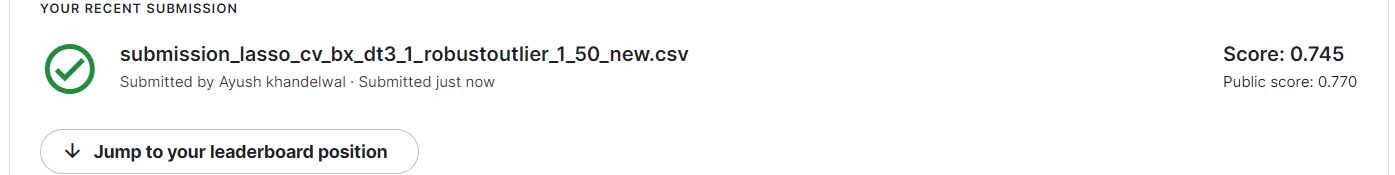

SVClassifier

Fitting 7 folds for each of 18 candidates, totalling 126 fits
best alpha/parameter {'C': 20, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [20, 30, 40], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


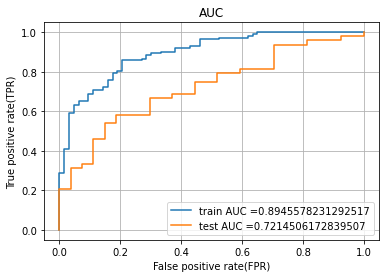

In [112]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01],
        'C': [20,30,40],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,box_cox_train_ss,y_train)
print(classifier)

svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model20=modelling(svc_model,box_cox_train_ss,y_train,box_cox_test_ss)

svc_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

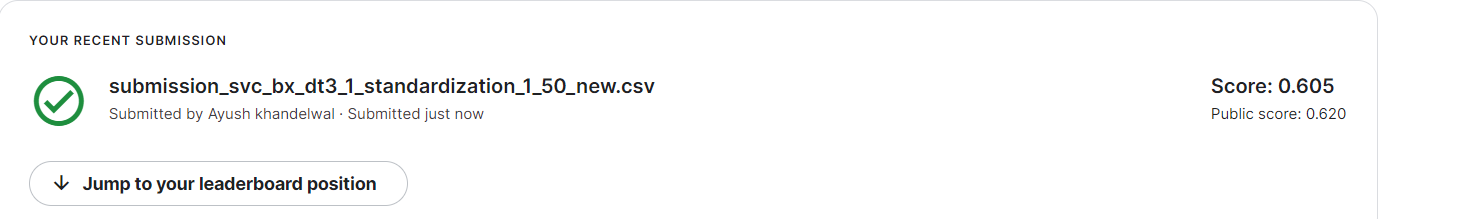

Decision Tree

Fitting 7 folds for each of 640 candidates, totalling 4480 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 2, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


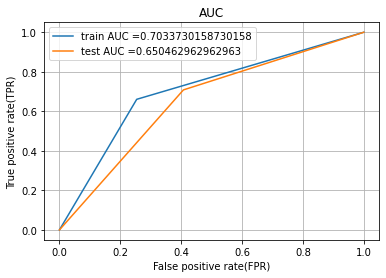

In [113]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8],
      'max_features':['auto', 'sqrt', 'log2',None]}
classifier=parameters_models(decision_tree,param,box_cox_train_ss,y_train)
print(classifier)

decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model21=modelling(decision_tree_model,box_cox_train_ss,y_train,box_cox_test_ss)


dt_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Random Forest

Fitting 7 folds for each of 720 candidates, totalling 5040 fits
best alpha/parameter {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 6}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [4, 5, 6]},
             return_train_score=True, scoring='roc_auc', verbose=1)


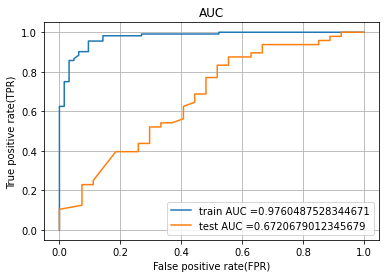

In [114]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[4,5,6],'max_depth':[10,12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,5,7,9],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,box_cox_train_ss,y_train)
print(classifier)

random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'])

y_train_pred,y_test_pred,model22=modelling(random_forest_model,box_cox_train_ss,y_train,box_cox_test_ss)

rf_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Xgboost

Fitting 7 folds for each of 648 candidates, totalling 4536 fits
[22:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.5, 'learning_rate': 0.03, 'max_depth': 1, 'n_estimators': 20, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                           

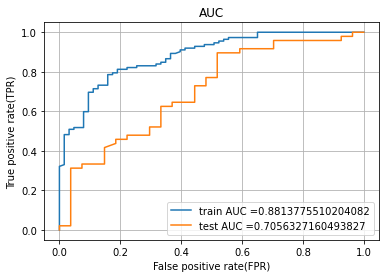

In [115]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[1,2,3],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,box_cox_train_ss,y_train)
print(classifier)

xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model23=modelling(xgb_model,box_cox_train_ss,y_train,box_cox_test_ss)

xgb_bx_dt3=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Dataset4 - PCA on the original features. Take those many principal components which would explain 95% of the variance in the data. Please print the variance explained by taking the number of principal components in a list and fitting the PCA.

In [22]:
variance_list=[]
for i in range(1,X_train.shape[0]):
    pca=PCA(n_components=i)
    pca.fit_transform(X_train_ss,y_train)
    variance_list.append(pca.explained_variance_ratio_)
    
print(variance_list)

[array([0.01743371]), array([0.01743371, 0.01681867]), array([0.01743371, 0.01681867, 0.01666978]), array([0.01743371, 0.01681867, 0.01666978, 0.01611685]), array([0.01743371, 0.01681867, 0.01666978, 0.01611685, 0.01569314]), array([0.01743371, 0.01681867, 0.01666978, 0.01611685, 0.01569314,
       0.01537978]), array([0.01743371, 0.01681867, 0.01666978, 0.01611685, 0.01569314,
       0.01537978, 0.01510229]), array([0.01743371, 0.01681867, 0.01666978, 0.01611685, 0.01569314,
       0.01537978, 0.01510229, 0.01476354]), array([0.01743371, 0.01681867, 0.01666978, 0.01611685, 0.01569314,
       0.01537978, 0.01510229, 0.01476354, 0.01459807]), array([0.01743371, 0.01681867, 0.01666978, 0.01611685, 0.01569314,
       0.01537978, 0.01510229, 0.01476354, 0.01459807, 0.01418676]), array([0.01743371, 0.01681867, 0.01666978, 0.01611685, 0.01569314,
       0.01537978, 0.01510229, 0.01476354, 0.01459807, 0.01418676,
       0.01407746]), array([0.01743371, 0.01681867, 0.01666978, 0.01611685, 0.01

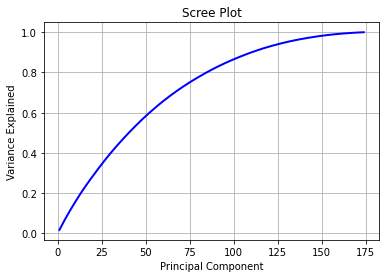

In [23]:
val=np.arange(pca.n_components)+1

plt.plot(val, np.cumsum(pca.explained_variance_ratio_),linewidth=2, color='blue')
plt.grid()
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Taking the number of components =145 because it has preserved 99% variance

In [24]:
pca_fitted=PCA(n_components=145)
pca_fitted_train=pca_fitted.fit_transform(X_train_ss)
pca_fitted_test=pca_fitted.transform(X_test_ss)

Decision Tree

Fitting 7 folds for each of 128 candidates, totalling 896 fits
best alpha/parameter {'criterion': 'entropy', 'max_depth': 12, 'max_leaf_nodes': 5, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


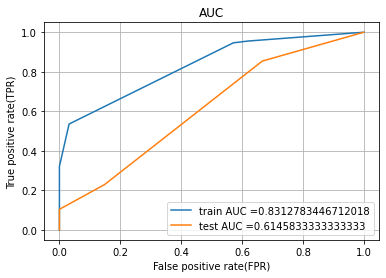

In [25]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,12,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,pca_fitted_train,y_train)
print(classifier)

decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model24=modelling(decision_tree_model,pca_fitted_train,y_train,pca_fitted_test)


dt_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

LassoCV

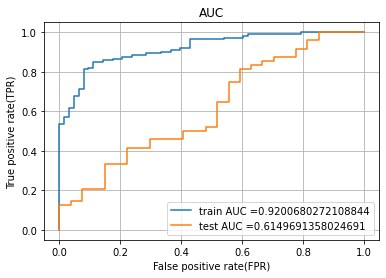

In [26]:
lasso_cv=LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
y_train_pred,y_test_pred,model25=modelling_lasso(lasso_cv,pca_fitted_train,y_train,pca_fitted_test)

lasso_cv_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Logistic Regression

Fitting 7 folds for each of 12 candidates, totalling 84 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


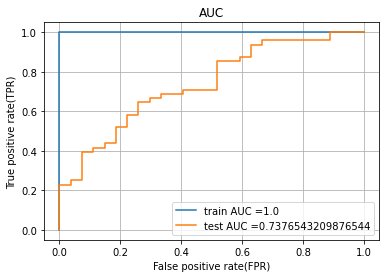

In [27]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,pca_fitted_train,y_train)
print(classifier)

log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model26=modelling(log_reg_model,pca_fitted_train,y_train,pca_fitted_test)

lg_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

SVClassifier

Fitting 7 folds for each of 32 candidates, totalling 224 fits
best alpha/parameter {'C': 7, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [4, 5, 6, 7], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


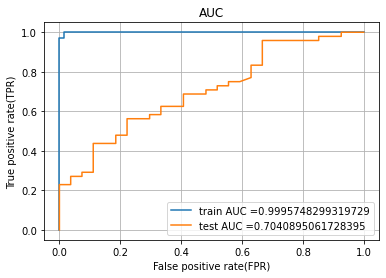

In [28]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1],
        'C': [4,5,6,7],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,pca_fitted_train,y_train)
print(classifier)

svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model27=modelling(svc_model,pca_fitted_train,y_train,pca_fitted_test)

svc_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Random Forest

Fitting 7 folds for each of 576 candidates, totalling 4032 fits
best alpha/parameter {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 4}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [2, 3, 4]},
             return_train_score=True, scoring='roc_auc', verbose=1)


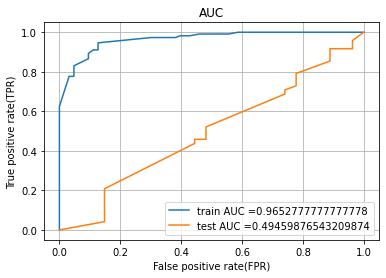

In [29]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[2,3,4],'max_depth':[12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,5,7,9],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,pca_fitted_train,y_train)
print(classifier)

random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'])
y_train_pred,y_test_pred,model28=modelling(random_forest_model,pca_fitted_train,y_train,pca_fitted_test)

rf_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Xgboost

Fitting 7 folds for each of 648 candidates, totalling 4536 fits
[08:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 15, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                            

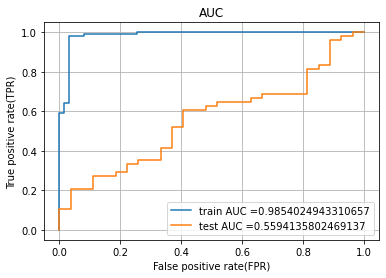

In [30]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[1,2,3],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,pca_fitted_train,y_train)
print(classifier)

xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model29=modelling(xgb_model,pca_fitted_train,y_train,pca_fitted_test)

xgb_dt4=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

##  Dataset5 - Oversampling the data to make it balanced and also on top of that reduced feature set along with feature transformation and standardization

## Standardization With Oversampling

In [33]:
X_train_os,y_train_os=oversampled_ro(X_train,y_train)

X_train_os_ss,X_test_ss,df_train_os_ss,df_test_ss,df_test_final_os=robust_scaler(X_train_os,X_test,data_test_1)

print((df_train_os_ss.shape),df_test_ss.shape,df_test_final_os.shape)

(224, 300) (75, 300) (19750, 300)


## Decision Tree with Oversampling using RFECV¶

In [49]:
decision_tree=DecisionTreeClassifier()
best_cv=StratifiedKFold(n_splits=7)
rfecv=feature_selection(decision_tree,X_train_os_ss,y_train_os)

Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
Fitting estimator with 230 features.
Fitting estimator with 220 features.
Fitting estimator with 210 features.
Fitting estimator with 200 features.
Fitting estimator with 190 features.
Fitting estimator with 180 features.
Fitting estimator with 170 features.
Fitting estimator with 160 features.
Fitting estimator with 150 features.
Fitting estimator with 140 features.
Fitting estimator with 130 features.
Fitting estimator with 120 features.
Fitting estimator with 110 features.
Optimal Feature 100
Feature_names ['x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25' 'x26' 'x27'
 'x28' 'x29' 'x30' 'x31' 'x32' 'x33' 'x34' 'x35' 'x36' 'x37' 'x38' 'x39'
 'x40' 'x41' 'x42' 'x43' 'x44' 'x45' 'x46' 'x47' 'x48' 'x49' 'x50' 'x51'
 'x52' 

In [50]:
top_80_feat=list(np.where(rfecv)[0])[:60]

In [51]:
df_train_reduced_os=df_train_os_ss[df_train_os_ss.columns[top_80_feat]]
df_test_reduced_os=df_test_ss[df_train_os_ss.columns[top_80_feat]]
df_test_original_reduced_os=df_test_final_os[df_train_os_ss.columns[top_80_feat]]
print((df_train_reduced_os.shape),df_test_reduced_os.shape,df_test_original_reduced_os.shape)

(224, 60) (75, 60) (19750, 60)


## Logistic Regression

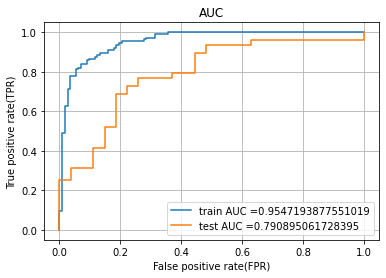

In [52]:
log_reg_model=LogisticRegression()
y_train_pred,y_test_pred,model30=modelling(log_reg_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

lg_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## LassoCV

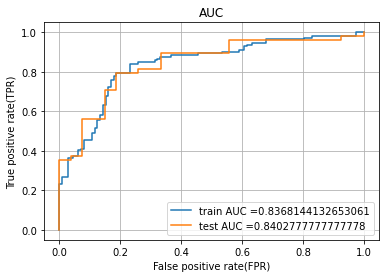

In [53]:
lasso_cv=LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
y_train_pred,y_test_pred,model31=modelling_lasso(lasso_cv,df_train_reduced_os,y_train_os,df_test_reduced_os)

lasso_cv_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

In [54]:
test_id = data_test['id']
lasso_cv_os_dt5 = model31.predict(df_test_original_reduced_os)
lasso_cv_os_dt5_1 = pd.DataFrame(np.column_stack((test_id,lasso_cv_os_dt5)), columns=['id','target'])
lasso_cv_os_dt5_1['id'] = lasso_cv_os_dt5_1['id'].astype('int32')
lasso_cv_os_dt5_1.to_csv('submission_lasso_cv_os_dt5_1_robustoutlier_1_50_.csv', index=False)

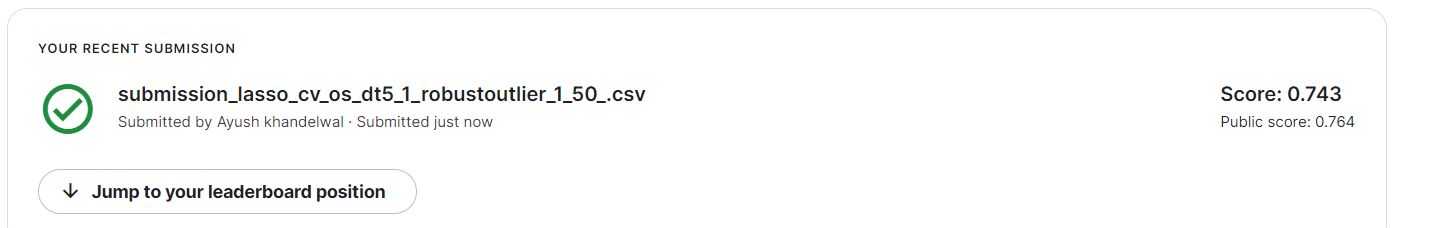

## SVClassifier

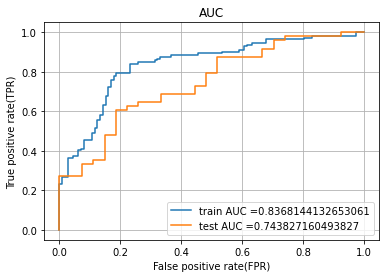

In [55]:
svc=SVC(probability=True)
yy_train_pred,y_test_pred,model32=modelling(svc,df_train_reduced_os,y_train_os,df_test_reduced_os)

svc_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

In [110]:
test_id = data_test['id']
svc_os_dt5 = model32.predict_proba(df_test_original_reduced_os)[:,1]
svc_os_dt5_1 = pd.DataFrame(np.column_stack((test_id,svc_os_dt5)), columns=['id','target'])
svc_os_dt5_1['id'] = svc_os_dt5_1['id'].astype('int32')
svc_os_dt5_1.to_csv('submission_svc_os_dt5_1_robustoutlier_1_50_.csv', index=False)

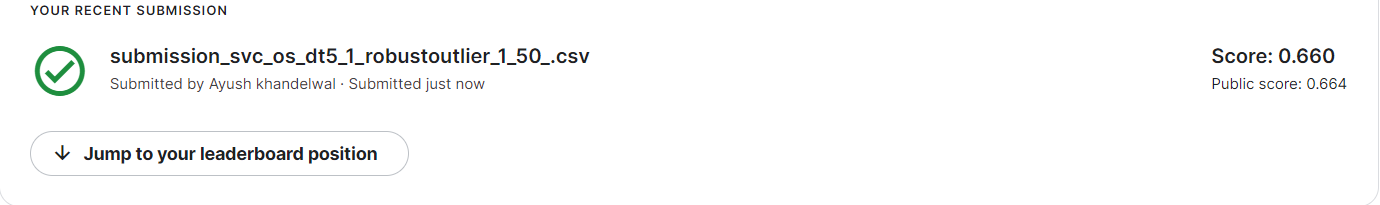

## Decision Tree

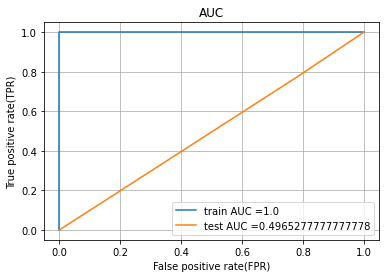

In [56]:
decision_tree=DecisionTreeClassifier()
y_train_pred,y_test_pred,model33=modelling(decision_tree,df_train_reduced_os,y_train_os,df_test_reduced_os)

dt_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

 ## Random Forest

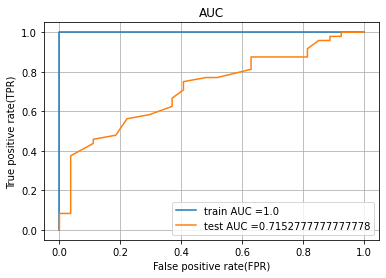

In [45]:
random_forest_model=RandomForestClassifier()
y_train_pred,y_test_pred,model34=modelling(random_forest_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

rf_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

 ## Xgboost

[08:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


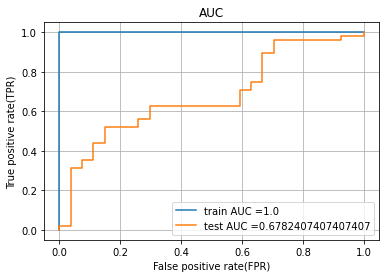

In [57]:
xgb_model=XGBClassifier()
y_train_pred,y_test_pred,model35=modelling(xgb_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

xgb_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)




## Logistic Regression using Hyperparameter with Oversampling

Fitting 7 folds for each of 12 candidates, totalling 84 fits
best alpha/parameter {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


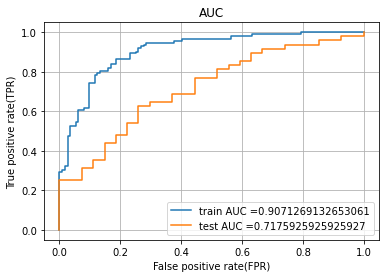

In [58]:
logistic_regression=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(logistic_regression,param,df_train_reduced_os,y_train_os)
print(classifier)

log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model36=modelling(log_reg_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

lg_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## SVClassifier using Hyperparameter with Oversampling

Fitting 7 folds for each of 30 candidates, totalling 210 fits
best alpha/parameter {'C': 2, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [2, 3, 4], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


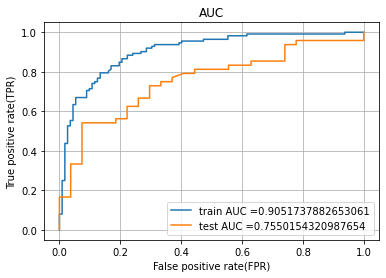

In [59]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
        'C': [2,3,4],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,df_train_reduced_os,y_train_os)
print(classifier)

svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model37=modelling(svc_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

svc_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## SGD with hinge loss

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


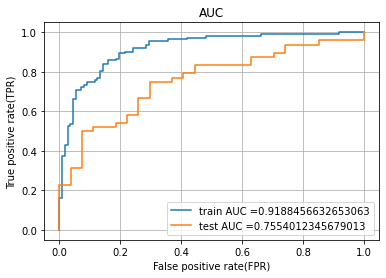

In [88]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

sgd_os_h_dt5_hinge=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## SGD with logloss

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.6, 0: 0.4}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


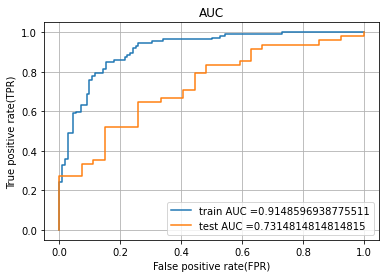

In [89]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced_os,y_train_os)
print(classifier)



sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced_os,y_train_os)

y_train_pred,y_test_pred,model001=calibrated(sgd_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

sgd_os_h_dt5_log=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## SGD with huber loss

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


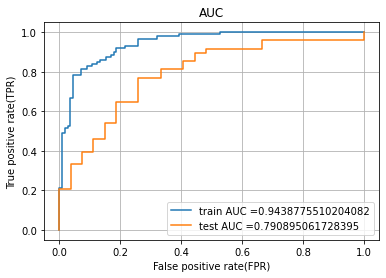

In [90]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,df_train_reduced_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(df_train_reduced_os,y_train_os)

y_train_pred,y_test_pred,model001=calibrated(sgd_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

sgd_os_h_dt5_huber=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Decision Tree using Hyperparameter with Oversampling

Fitting 7 folds for each of 160 candidates, totalling 1120 fits
best alpha/parameter {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 13, 14],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


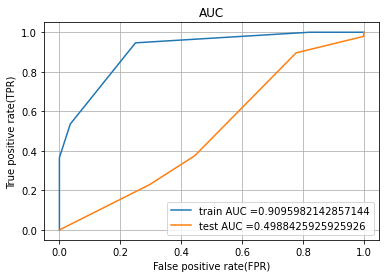

In [60]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[10,11,12,13,14],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,df_train_reduced_os,y_train_os)
print(classifier)


decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model38=modelling(decision_tree_model,df_train_reduced_os,y_train_os,df_test_reduced_os)


dt_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Random Forest using Hyperparameter with Oversampling

Fitting 7 folds for each of 720 candidates, totalling 5040 fits
best alpha/parameter {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 4}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [3, 4, 5]},
             return_train_score=True, scoring='roc_auc', verbose=1)


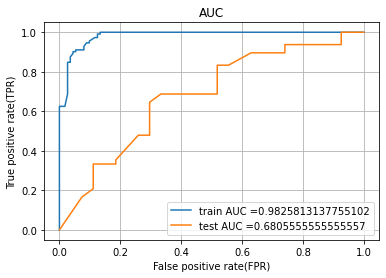

In [61]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[3,4,5],'max_depth':[10,12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,4,5,6],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,df_train_reduced_os,y_train_os)
print(classifier)

random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features']                  )
y_train_pred,y_test_pred,model39=modelling(random_forest_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

rf_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Xgboost using Hyperparameter with Oversampling

Fitting 7 folds for each of 648 candidates, totalling 4536 fits
[08:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                            

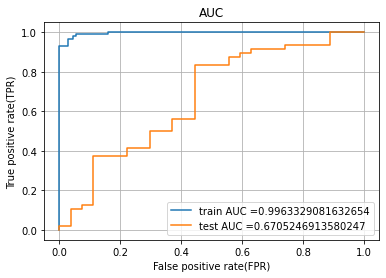

In [62]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[2,3,5],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,df_train_reduced_os,y_train_os)
print(classifier)

xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)
y_train_pred,y_test_pred,model40=modelling(xgb_model,df_train_reduced_os,y_train_os,df_test_reduced_os)

xgb_os_h_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Feature Enginnering With Oversampling

I have done feature enginnering with oversampled dataset and standardize it.

I have merged 2 dataframe the enginnered standardize feature and reduced standardize feature which i got from to do modelling.

My reduced feature are already standardize when i have done logistic regression modelling to get reduced features

In [63]:
df_train_feature_eng_os=pd.DataFrame()
df_train_feature_eng_os=feature_enginnering(X_train_os,df_train_feature_eng_os)
df_train_feature_eng_os.shape

(224, 48)

In [64]:
df_test_feature_eng_os=pd.DataFrame()
df_test_feature_eng_os=feature_enginnering(X_test,df_test_feature_eng_os)
df_test_feature_eng_os.shape

(75, 48)

In [65]:
df_test_feature_original_eng_os=pd.DataFrame()
df_test_feature_original_eng_os=feature_enginnering(df_test_final_os,df_test_feature_original_eng_os)
df_test_feature_original_eng_os.shape

(19750, 48)

In [66]:
train_eng_os,test_eng_os,df_train_eng_os_ss,df_test_eng_os_ss,df_test_original_os_ss=robust_scaler(df_train_feature_eng_os,df_test_feature_eng_os,df_test_feature_original_eng_os)

## Merging of Features

In [67]:
frames1=[df_train_eng_os_ss,df_train_reduced_os]
final_dataframe_train_os=pd.concat(frames1,axis=1)

In [68]:
frames=[df_test_eng_os_ss,df_test_reduced_os]
final_dataframe_test_os=pd.concat(frames,axis=1)

In [69]:
frames3=[df_test_original_os_ss,df_test_original_reduced_os]
final_dataframe_original_test_os=pd.concat(frames3,axis=1)



## Feature Transformation

BoxCox Transformation

In [70]:
final_dataframe_train_box_cox_os,final_dataframe_test_box_cox_os,final_dataframe_original_test_box_cox_os=box_cox_transformation(final_dataframe_train_os,final_dataframe_test_os,final_dataframe_original_test_os)

Logistic Regression

In [71]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [72]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model41=modelling(log_reg_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

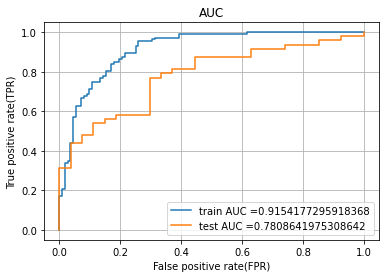

In [73]:
lg_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

LassoCV

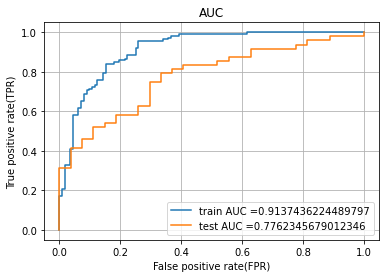

In [74]:
lasso_cv=LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
y_train_pred,y_test_pred,model42=modelling_lasso(lasso_cv,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

lasso_cv_bx_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

SGD with hinge loss

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.6, 0: 0.4}, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


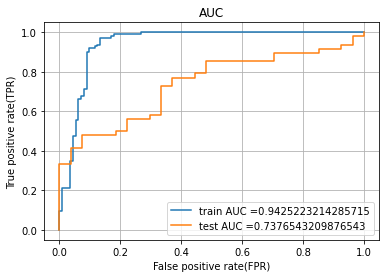

In [91]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(final_dataframe_train_box_cox_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

sgd_h_bx_dt5_hinge=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

SGD with logloss

Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='roc_auc', verbose=1)


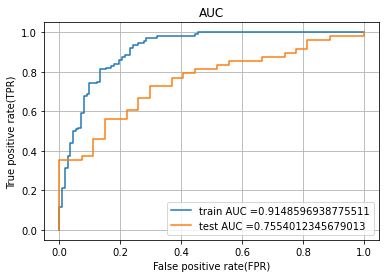

In [92]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
                       class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(final_dataframe_train_box_cox_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

sgd_h_bx_dt5_log=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)


SGD with huber loss

In [ ]:
sgd=SGDClassifier()
param={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
#        'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
classifier=parameters_models(sgd,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

sgd_model=SGDClassifier(alpha=classifier.best_params_['alpha'],
                        penalty=classifier.best_params_['penalty'],
                        loss=classifier.best_params_['loss'],
#                        class_weight=classifier.best_params_['class_weight'],
                       learning_rate=classifier.best_params_['learning_rate'])
sgd_model.fit(final_dataframe_train_box_cox_os,y_train_os)

y_train_pred,y_test_pred,model7=calibrated(sgd_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

sgd_h_bx_dt5_huber=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

SVClassifier

In [75]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
        'C': [2,3,4],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)


Fitting 7 folds for each of 30 candidates, totalling 210 fits
best alpha/parameter {'C': 4, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [2, 3, 4], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [76]:
svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model43=modelling(svc_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

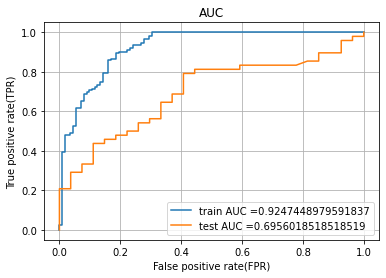

In [77]:
svc_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Decision Tree

In [78]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[11,12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)


Fitting 7 folds for each of 160 candidates, totalling 1120 fits
best alpha/parameter {'criterion': 'entropy', 'max_depth': 13, 'max_leaf_nodes': 3, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [11, 12, 13, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [79]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model44=modelling(decision_tree_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

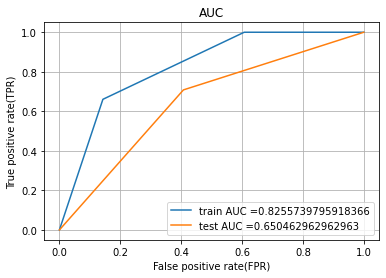

In [80]:
dt_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Random Forest

In [81]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[2,3,4,5],'max_depth':[4,5,6,7],'min_samples_leaf':[1,2,3],
        'min_samples_split':[3,4,5],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 432 candidates, totalling 3024 fits
best alpha/parameter {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 5}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [82]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features']                  )

y_train_pred,y_test_pred,model45=modelling(random_forest_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

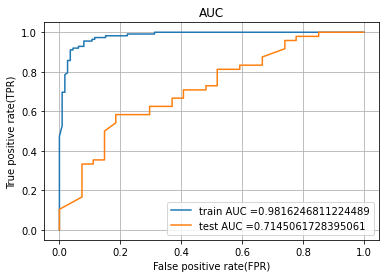

In [83]:
rf_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Xgboost

In [84]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,3,4,5],
        'max_depth':[2,5,7,11,15,20],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 432 candidates, totalling 3024 fits
[08:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5, 'subsample': 0.3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                             

In [85]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model46=modelling(xgb_model,final_dataframe_train_box_cox_os,y_train_os,final_dataframe_test_box_cox_os)

[08:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


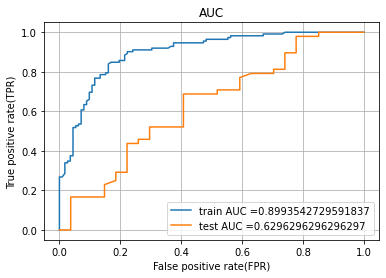

In [86]:
xgb_bx_os_dt5=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Dataset6 -  PCA also on the reduced featureset.

In [87]:
variance_list=[]
for i in range(1,df_train_reduced.shape[1]):
    pca=PCA(n_components=i)
    pca.fit_transform(df_train_reduced,y_train)
    variance_list.append(pca.explained_variance_ratio_)
    
print(variance_list)

NameError: name 'df_train_reduced' is not defined

In [ ]:
val=np.arange(pca.n_components)+1

plt.plot(val, np.cumsum(pca.explained_variance_ratio_),linewidth=2, color='blue')
plt.grid()
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca_fitted=PCA(n_components=36)
pca_fitted_train=pca_fitted.fit_transform(df_train_reduced)
pca_fitted_test=pca_fitted.transform(df_test_reduced)

Logistic Regression

In [ ]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,pca_fitted_train,y_train)
print(classifier)

In [ ]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model47=modelling(log_reg_model,pca_fitted_train,y_train,pca_fitted_test)

In [ ]:
lg_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

In [ ]:
lasso_cv=LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
y_train_pred,y_test_pred,model48=modelling_lasso(lasso_cv,pca_fitted_train,y_train,pca_fitted_test)

lasso_cv_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

SVClassifier

In [ ]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1],
        'C': [30,40,50,60],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,pca_fitted_train,y_train)
print(classifier)


In [ ]:
svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])

y_train_pred,y_test_pred,model49=modelling(svc_model,pca_fitted_train,y_train,pca_fitted_test)

In [ ]:
svc_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Decision Tree


In [ ]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,pca_fitted_train,y_train)
print(classifier)

In [ ]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model50=modelling(decision_tree_model,pca_fitted_train,y_train,pca_fitted_test)


In [ ]:
dt_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Random Forest

In [156]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[2,3,4,5],'max_depth':[12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,4,5,6],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,pca_fitted_train,y_train)
print(classifier)

Fitting 7 folds for each of 768 candidates, totalling 5376 fits
best alpha/parameter {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [2, 3, 4, 5]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [157]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'])
y_train_pred,y_test_pred,model51=modelling(random_forest_model,pca_fitted_train,y_train,pca_fitted_test)

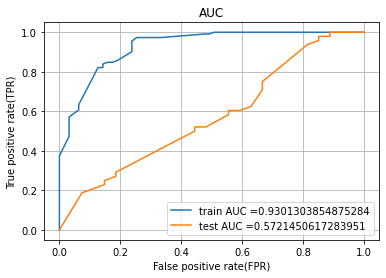

In [158]:
rf_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Xgboost

In [159]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,3,4],
        'max_depth':[2,5,7,11,15,20],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,pca_fitted_train,y_train)
print(classifier)

Fitting 7 folds for each of 324 candidates, totalling 2268 fits
[11:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 4, 'subsample': 0.3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                            

In [160]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model52=modelling(xgb_model,pca_fitted_train,y_train,pca_fitted_test)

[11:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


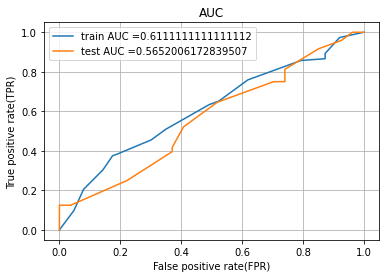

In [161]:
xgb_dt6=roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Dataset 7 Dataset with transformed features on the reduced dimensionality along with standardization And OVERSAMPLING

BoxCox Transformation

In [162]:
box_cox_train_ss_os,box_cox_test_ss_os,box_cox_original_test_ss_os=box_cox_transformation(df_train_reduced_os,df_test_reduced_os,
                                                                df_test_original_reduced_os)

In [163]:
print((box_cox_train_ss_os.shape),box_cox_test_ss_os.shape,box_cox_original_test_ss_os.shape)

(224, 80) (75, 80) (19750, 80)


Logistic Regression

In [164]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,box_cox_train_ss_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [165]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
y_train_pred,y_test_pred,model53=modelling(log_reg_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

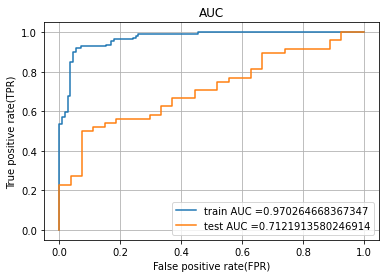

In [166]:
lg_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

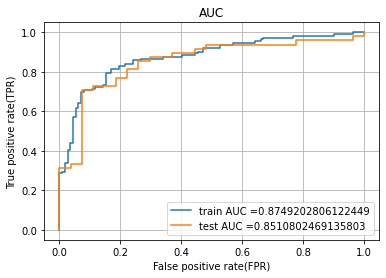

In [168]:
lasso_cv=LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
y_train_pred,y_test_pred,model54=modelling_lasso(lasso_cv,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

lasso_cv_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

In [169]:
test_id = data_test['id']
lasso_cv_os_dt7 = model54.predict(box_cox_original_test_ss_os)
lasso_cv_os_dt7_1 = pd.DataFrame(np.column_stack((test_id,lasso_cv_os_dt7)), columns=['id','target'])
lasso_cv_os_dt7_1['id'] = svc_bx_dt3_1['id'].astype('int32')
lasso_cv_os_dt7_1.to_csv('submission_lasso_cv_os_dt7_1_robustoutlier_1_50_.csv', index=False)

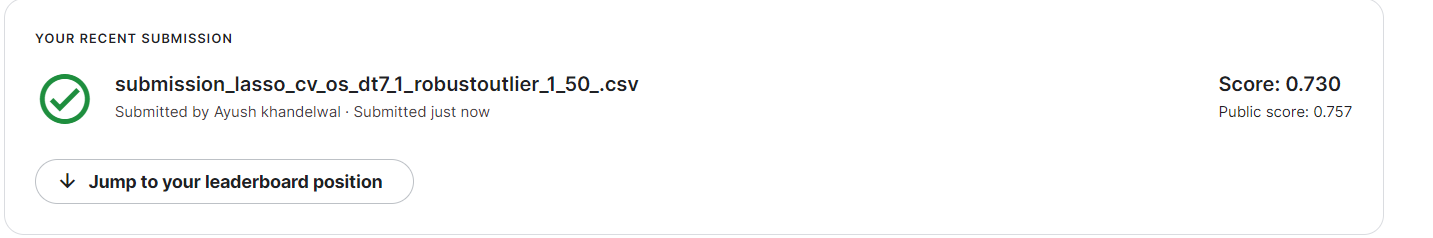

SVClassifier

In [170]:
svc=SVC(probability=True)
param={'kernel': ['sigmoid','linear'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1,],
        'C': [20,30,40,50],
        'class_weight': ['balanced'],
         'probability':[True]}

classifier=parameters_models(svc,param,box_cox_train_ss_os,y_train_os)
print(classifier)


Fitting 7 folds for each of 32 candidates, totalling 224 fits
best alpha/parameter {'C': 50, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [20, 30, 40, 50], 'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['sigmoid', 'linear'],
                         'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [171]:
svc_model=SVC(class_weight='balanced', kernel=classifier.best_params_['kernel'],gamma=classifier.best_params_['gamma'],
                       C=classifier.best_params_['C'],probability=classifier.best_params_['probability'])
y_train_pred,y_test_pred,model55=modelling(svc_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

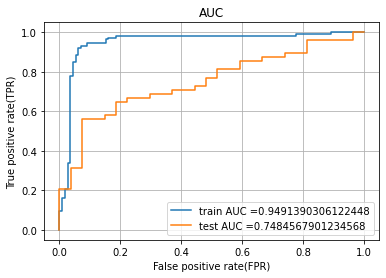

In [172]:
svc_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Decision Tree

In [173]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[11,12,13,14,15],'min_samples_split':[3,5,7,9],'criterion': ['gini', 'entropy'],'max_leaf_nodes':[2,3,5,8]}
classifier=parameters_models(decision_tree,param,box_cox_train_ss_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 160 candidates, totalling 1120 fits
best alpha/parameter {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 8, 'min_samples_split': 3}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [11, 12, 13, 14, 15],
                         'max_leaf_nodes': [2, 3, 5, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [174]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_leaf_nodes=classifier.best_params_['max_leaf_nodes'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])

y_train_pred,y_test_pred,model56=modelling(decision_tree_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

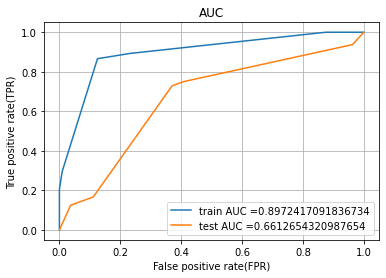

In [175]:
dt_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Random Forest

In [176]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[2,3,4],'max_depth':[11,12,13,14,15],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,4,5,6],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,box_cox_train_ss_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 720 candidates, totalling 5040 fits
best alpha/parameter {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 4}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [11, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [2, 3, 4]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [177]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features'])

y_train_pred,y_test_pred,model57=modelling(random_forest_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

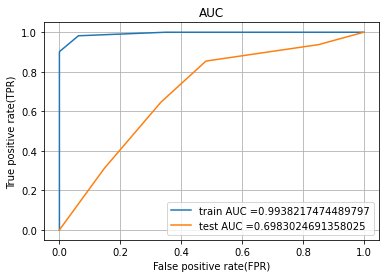

In [178]:
rf_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Xgboost

In [179]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,3,4,5],
        'max_depth':[2,5,7,11,15,20],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]
}
classifier=parameters_models(xgb,param,box_cox_train_ss_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 432 candidates, totalling 3024 fits
[11:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 5, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                             

In [180]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

y_train_pred,y_test_pred,model58=modelling(xgb_model,box_cox_train_ss_os,y_train_os,box_cox_test_ss_os)

[11:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


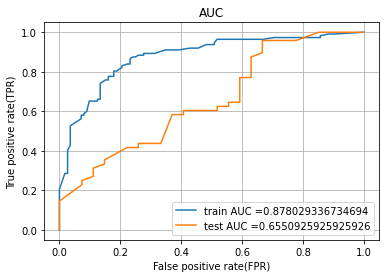

In [181]:
xgb_bx_os_dt7=roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

In [152]:
table=PrettyTable(['Dataset','clf','feat selection','Hyperpar Tuning','oversampling','transformation','PCA','train_auc','test_auc'])
table.add_row(['DATASET 1','Log_Reg','RFECV','no','no','no','no',np.round(lg_dt1[0],4),np.round(lg_dt1[1],4)])
table.add_row(['DATASET 1','LassoCV','RFECV','no','no','no','no',np.round(lasso_cv_dt1[0],4),np.round(lasso_cv_dt1[1],4)])
table.add_row(['DATASET 1','SVC','RFECV','no','no','no','no',np.round(svc_dt1[0],4),np.round(svc_dt1[1],4)])
table.add_row(['DATASET 1','DT','RFECV','no','no','no','no',np.round(dt_dt1[0],4),np.round(dt_dt1[1],4)])
table.add_row(['DATASET 1','RF','RFECV','no','no','no','no',np.round(rf_dt1[0],4),np.round(rf_dt1[1],4)])
table.add_row(['DATASET 1','XGboost','RFECV','no','no','no','no',np.round(xgb_dt1[0],4),np.round(xgb_dt1[1],4)])


table.add_row(['DATASET 1','Log_Reg','RFECV','yes','no','no','no',np.round(lg_h_dt1[0],4),np.round(lg_h_dt1[1],4)])
table.add_row(['DATASET 1','SVC','RFECV','yes','no','no','no',np.round(svc_h_dt1[0],4),np.round(svc_h_dt1[1],4)])
table.add_row(['DATASET 1','DT','RFECV','yes','no','no','no',np.round(dt_h_dt1[0],4),np.round(dt_h_dt1[1],4)])
table.add_row(['DATASET 1','RF','RFECV','yes','no','no','no',np.round(rf_h_dt1[0],4),np.round(rf_h_dt1[1],4)])
table.add_row(['DATASET 1','XGboost','RFECV','yes','no','no','no',np.round(xgb_h_dt1[0],4),np.round(xgb_h_dt1[1],4)])


table.add_row(['DATASET 2','Log_Reg','no','yes','no','no','no',np.round(lg_dt2[0],4),np.round(lg_dt2[1],4)])
table.add_row(['DATASET 2','LassoCV','no','yes','no','no','no',np.round(lasso_cv_dt2[0],4),np.round(lasso_cv_dt2[1],4)])
table.add_row(['DATASET 2','SVC','no','yes','no','no','no',np.round(svc_dt2[0],4),np.round(svc_dt2[1],4)])
table.add_row(['DATASET 2','DT','no','yes','no','no','no',np.round(dt_dt2[0],4),np.round(dt_dt2[1],4)])
table.add_row(['DATASET 2','RF','no','yes','no','no','no',np.round(rf_dt2[0],4),np.round(rf_dt2[1],4)])
table.add_row(['DATASET 2','XGboost','no','yes','no','no','no',np.round(xgb_dt2[0],4),np.round(xgb_dt2[1],4)])


table.add_row(['DATASET 3','Log_Reg','RFECV','yes','no','yes_box_cox','no',np.round(lg_bx_dt3[0],4),np.round(lg_bx_dt3[1],4)])
table.add_row(['DATASET 3','LassoCV','RFECV','yes','no','yes_box_cox','no',np.round(lasso_cv_bx_dt3[0],4),np.round(lasso_cv_bx_dt3[1],4)])
table.add_row(['DATASET 3','SVC','RFECV','yes','no','yes_box_cox','no',np.round(svc_bx_dt3[0],4),np.round(svc_bx_dt3[1],4)])
table.add_row(['DATASET 3','DT','RFECV','yes','no','yes_box_cox','no',np.round(dt_bx_dt3[0],4),np.round(dt_bx_dt3[1],4)])
table.add_row(['DATASET 3','RF','RFECV','yes','no','yes_box_cox','no',np.round(rf_bx_dt3[0],4),np.round(rf_bx_dt3[1],4)])
table.add_row(['DATASET 3','XGboost','RFECV','yes','no','yes_box_cox','no',np.round(xgb_bx_dt3[0],4),np.round(xgb_bx_dt3[1],4)])



table.add_row(['DATASET 4','Log_Reg','no','yes','no','no','yes',np.round(lg_dt4[0],4),np.round(lg_dt4[1],4)])
table.add_row(['DATASET 4','LassoCV','no','yes','no','no','yes',np.round(lasso_cv_dt4[0],4),np.round(lasso_cv_dt4[1],4)])
table.add_row(['DATASET 4','SVC','no','yes','no','no','yes',np.round(svc_dt4[0],4),np.round(svc_dt4[1],4)])
table.add_row(['DATASET 4','DT','no','yes','no','no','yes',np.round(dt_dt4[0],4),np.round(dt_dt4[1],4)])
table.add_row(['DATASET 4','RF','no','yes','no','no','yes',np.round(rf_dt4[0],4),np.round(rf_dt4[1],4)])
table.add_row(['DATASET 4','XGboost','no','yes','no','no','yes',np.round(xgb_dt4[0],4),np.round(xgb_dt4[1],4)])


table.add_row(['DATASET 5','Log_Reg','RFECV','no','yes','no','no',np.round(lg_os_dt5[0],4),np.round(lg_os_dt5[1],4)])
table.add_row(['DATASET 5','LassoCV','RFECV','no','yes','no','no',np.round(lasso_cv_os_dt5[0],4),np.round(lasso_cv_os_dt5[1],4)])
table.add_row(['DATASET 5','SVC','RFECV','no','yes','no','no',np.round(svc_os_dt5[0],4),np.round(svc_os_dt5[1],4)])
table.add_row(['DATASET 5','DT','RFECV','no','yes','no','no',np.round(dt_os_dt5[0],4),np.round(dt_os_dt5[1],4)])
table.add_row(['DATASET 5','RF','RFECV','no','yes','no','no',np.round(rf_os_dt5[0],4),np.round(rf_os_dt5[1],4)])
table.add_row(['DATASET 5','XGboost','RFECV','no','yes','no','no',np.round(xgb_os_dt5[0],4),np.round(xgb_os_dt5[1],4)])


table.add_row(['DATASET 5','Log_Reg','RFECV','yes','yes','no','no',np.round(lg_os_h_dt5[0],4),np.round(lg_os_h_dt5[1],4)])
table.add_row(['DATASET 5','SVC','RFECV','yes','yes','no','no',np.round(svc_os_h_dt5[0],4),np.round(svc_os_h_dt5[1],4)])
table.add_row(['DATASET 5','DT','RFECV','yes','yes','no','no',np.round(dt_os_h_dt5[0],4),np.round(dt_os_h_dt5[1],4)])
table.add_row(['DATASET 5','RF','RFECV','yes','no','no','no',np.round(rf_os_h_dt5[0],4),np.round(rf_os_h_dt5[1],4)])
table.add_row(['DATASET 5','XGboost','RFECV','yes','yes','no','no',np.round(xgb_os_h_dt5[0],4),np.round(xgb_os_h_dt5[1],4)])


table.add_row(['DATASET 5','Log_Reg','RFECV','yes','yes','yes_box_cox','no',np.round(lg_bx_os_dt5[0],4),np.round(lg_bx_os_dt5[1],4)])
table.add_row(['DATASET 5','LassoCV','RFECV','yes','yes','yes_box_cox','no',np.round(lasso_cv_bx_dt5[0],4),np.round(lasso_cv_bx_dt5[1],4)])
table.add_row(['DATASET 5','SVC','RFECV','yes','yes','yes_box_cox','no',np.round(svc_bx_os_dt5[0],4),np.round(svc_bx_os_dt5[1],4)])
table.add_row(['DATASET 5','DT','RFECV','yes','yes','yes_box_cox','no',np.round(dt_bx_os_dt5[0],4),np.round(dt_bx_os_dt5[1],4)])
table.add_row(['DATASET 5','RF','RFECV','yes','yes','yes_box_cox','no',np.round(rf_bx_os_dt5[0],4),np.round(rf_bx_os_dt5[1],4)])
table.add_row(['DATASET 5','XGboost','RFECV','yes','yes','yes_box_cox','no',np.round(xgb_bx_os_dt5[0],4),np.round(xgb_bx_os_dt5[1],4)])


table.add_row(['DATASET 6','Log_Reg','yes','yes','no','no','yes',np.round(lg_dt6[0],4),np.round(lg_dt6[1],4)])
table.add_row(['DATASET 6','LassoCV','yes','yes','no','no','yes',np.round(lasso_cv_dt6[0],4),np.round(lasso_cv_dt6[1],4)])
table.add_row(['DATASET 6','SVC','yes','yes','no','no','yes',np.round(dt_dt6[0],4),np.round(dt_dt6[1],4)])
table.add_row(['DATASET 6','DT','yes','yes','no','no','yes',np.round(dt_dt6[0],4),np.round(dt_dt6[1],4)])
table.add_row(['DATASET 6','RF','yes','yes','no','no','yes',np.round(rf_dt6[0],4),np.round(rf_dt6[1],4)])
table.add_row(['DATASET 6','XGboost','yes','yes','no','no','yes',np.round(xgb_dt6[0],4),np.round(xgb_dt6[1],4)])


table.add_row(['DATASET 7','Log_Reg','RFECV','yes','yes','yes_box_cox','no',np.round(lg_bx_os_dt7[0],4),np.round(lg_bx_os_dt7[1],4)])
table.add_row(['DATASET 7','LassoCV','RFECV','yes','yes','yes_box_cox','no',np.round(lasso_cv_os_dt7[0],4),np.round(lasso_cv_os_dt7[1],4)])
table.add_row(['DATASET 7','SVC','RFECV','yes','yes','yes_box_cox','no',np.round(svc_bx_os_dt7[0],4),np.round(svc_bx_os_dt7[1],4)])
table.add_row(['DATASET 7','DT','RFECV','yes','yes','yes_box_cox','no',np.round(dt_bx_os_dt7[0],4),np.round(dt_bx_os_dt7[1],4)])
table.add_row(['DATASET 7','RF','RFECV','yes','yes','yes_box_cox','no',np.round(rf_bx_os_dt7[0],4),np.round(rf_bx_os_dt7[1],4)])
table.add_row(['DATASET 7','XGboost','RFECV','yes','yes','yes_box_cox','no',np.round(xgb_bx_os_dt7[0],4),np.round(xgb_bx_os_dt7[1],4)])

print(table)












+-----------+---------+----------------+-----------------+--------------+----------------+-----+-----------+----------+
|  Dataset  |   clf   | feat selection | Hyperpar Tuning | oversampling | transformation | PCA | train_auc | test_auc |
+-----------+---------+----------------+-----------------+--------------+----------------+-----+-----------+----------+
| DATASET 1 | Log_Reg |     RFECV      |        no       |      no      |       no       |  no |   0.9014  |  0.7461  |
| DATASET 1 | LassoCV |     RFECV      |        no       |      no      |       no       |  no |   0.7938  |  0.7647  |
| DATASET 1 |   SVC   |     RFECV      |        no       |      no      |       no       |  no |    1.0    |  0.7616  |
| DATASET 1 |    DT   |     RFECV      |        no       |      no      |       no       |  no |    1.0    |  0.5845  |
| DATASET 1 |    RF   |     RFECV      |        no       |      no      |       no       |  no |    1.0    |  0.6327  |
| DATASET 1 | XGboost |     RFECV      |

In [153]:
columns=['Dataset','clf','feat selection','Hyperpar Tuning','oversampling','transformation','PCA','train_auc','test_auc']
df_list=[]
for i in range(len(table.rows)):
    df_list.append(table.rows[i])
    
final_df = pd.DataFrame(df_list, columns =columns)
final_df
final_df.style.background_gradient()

,Dataset,clf,feat selection,Hyperpar Tuning,oversampling,transformation,PCA,train_auc,test_auc
0,DATASET 1,Log_Reg,RFECV,no,no,no,no,0.901400,0.746100
1,DATASET 1,LassoCV,RFECV,no,no,no,no,0.793800,0.764700
2,DATASET 1,SVC,RFECV,no,no,no,no,1.000000,0.761600
3,DATASET 1,DT,RFECV,no,no,no,no,1.000000,0.584500
4,DATASET 1,RF,RFECV,no,no,no,no,1.000000,0.632700
5,DATASET 1,XGboost,RFECV,no,no,no,no,1.000000,0.621900
6,DATASET 1,Log_Reg,RFECV,yes,no,no,no,0.787400,0.766200
7,DATASET 1,SVC,RFECV,yes,no,no,no,0.819700,0.732300
8,DATASET 1,DT,RFECV,yes,no,no,no,0.873900,0.542800
9,DATASET 1,RF,RFECV,yes,no,no,no,0.972900,0.532000
